## Resumen del notebook

En este notebook se implementa una regresión logisitca para una clasficación binomial.

Ya que en el notebook anterior el desempeño del modelo disminuyó, en este notebook se pretende manejar distintos hiperparametros e incrementar el numero del set de entrenamiento y de prueba para tratar de mejorar los resultados del modelo ante imagenes de lentes gravitacionales reales.

Al final del notebook se realiza una prueba del modelo entrenado con imagenes de lentes gravitacionales reales con forma de arco para analizar el desempeño ante estas imagenes imagenes. 
 

**Información del data set utilizado:**

No. Imagenes **sin** lentes para TRAIN: 2900

No. Imagenes **con** lentes para TRAIN: 3700


No. Imagenes **sin** lentes para TEST: 1700

No. Imagenes **con** lentes para TEST: 2500


**Principales hiperparametros de entrenamiento en este notebook:**

Tamaño en pixeles de las imagenes de entrenamiento: 64x64x3 

Alpha (learning rate): 0.009

Numero de iteraciones durante el entrenamiento: 2500

**Train accuracy:99.62%
Test accuracy: 88.81%**


Tamaño en pixeles de las imagenes de entrenamiento: 64x64x3 

Alpha (learning rate): 0.05

Numero de iteraciones durante el entrenamiento: 2500

**Train accuracy:99.83%
Test accuracy: 87.69%**


Tamaño en pixeles de las imagenes de entrenamiento: 64x64x3 

Alpha (learning rate): 0.3

Numero de iteraciones durante el entrenamiento: 1400

**Train accuracy:99.92%
Test accuracy: 87.04%**



**Desempeño de este modelo ante imagenes reales de lentes gravitacionales: MAL:** Realiza una mala clasificación en la mayoria de las imagenes reales. Se necesita mejorar el modelo en general y tratar de identificar por qué el rendimiento del modelo disminuyó.

**Desempeño del modelo con diferentes valores de alpha (learning rate):**

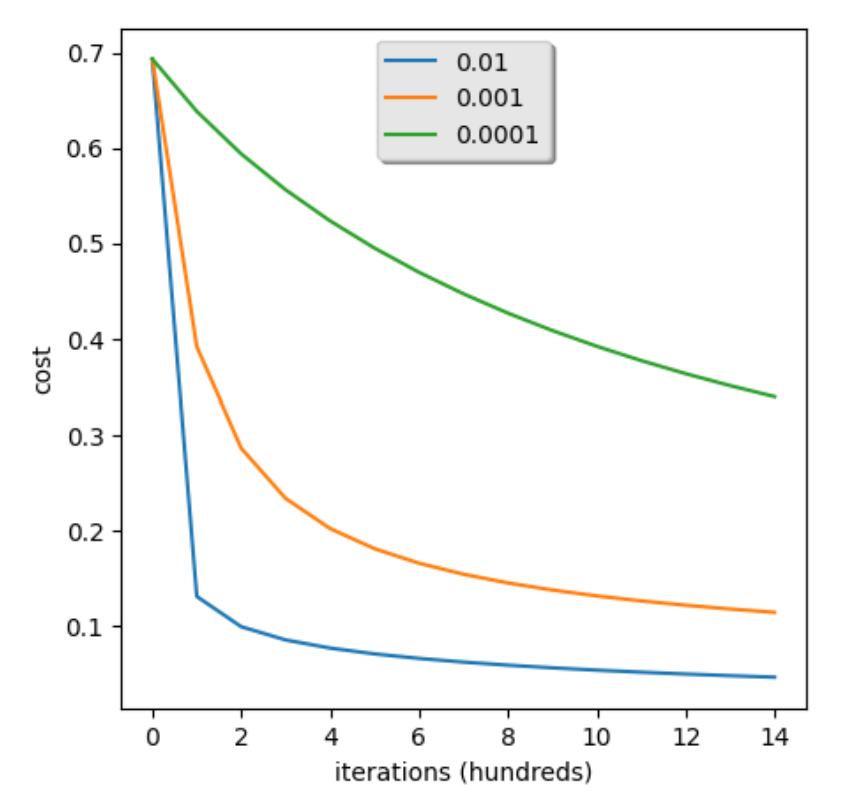

<a name='1'></a>
## Cargar librerias 

Primero cargamos las librerias necesarias para este notebook de clasificación binaria.

In [161]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset
from public_tests import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [162]:
#####
import tensorflow as tf
from astroNN.datasets import galaxy10
import sklearn
from sklearn.model_selection import train_test_split
#import scipy.ndimage
import cv2
from skimage.transform import PiecewiseAffineTransform, warp
from skimage import data
import os
import pandas as pd
import imutils

In [163]:
def seno_imagen(image, amplitud, periodo, nombre):

    rows, cols = image.shape[0], image.shape[1]

    src_cols = np.linspace(0, cols, 20)
    src_rows = np.linspace(0, rows, 10)
    src_rows, src_cols = np.meshgrid(src_rows, src_cols)
    src = np.dstack([src_cols.flat, src_rows.flat])[0]

    # add sinusoidal oscillation to row coordinates
    #dst_rows = src[:, 1] - np.sin(np.linspace(0, periodo, src.shape[0]) +12 ) * amplitud +150
    dst_rows = src[:, 1] - 0.38*np.sin(np.linspace(0, periodo, src.shape[0])/.5 ) * amplitud - 10
    dst_cols = src[:, 0]
    #dst_rows *= 1.5
    #dst_rows -= 1.5 * 50
    dst = np.vstack([dst_cols, dst_rows]).T


    tform = PiecewiseAffineTransform()
    tform.estimate(src, dst)

    out_rows = image.shape[0] # - 1.5 * 50
    out_cols = cols
    out = warp(image, tform, output_shape=(out_rows, out_cols))

    fig, ax = plt.subplots()
    ax.imshow(out)
    #ax.plot(tform.inverse(src)[:, 0], tform.inverse(src)[:, 1], '.b')
    #ax.axis((0, out_cols, out_rows, 0))
    plt.rcParams ["figure.figsize"] = (5,5)
    
    plt.axis('off')
    plt.imshow(out)
    
    #plt.savefig(nombre, bbox_inches='tight',pad_inches = 0, dpi=56.5)

In [164]:
def seno_imagen1(image, amplitud, periodo, nombre):

    rows, cols = image.shape[0], image.shape[1]

    src_cols = np.linspace(0, cols, 20)
    src_rows = np.linspace(0, rows, 10)
    src_rows, src_cols = np.meshgrid(src_rows, src_cols)
    src = np.dstack([src_cols.flat, src_rows.flat])[0]

    # add sinusoidal oscillation to row coordinates
    #dst_rows = src[:, 1] - np.sin(np.linspace(0, periodo, src.shape[0]) +12 ) * amplitud +150
    dst_rows = src[:, 1] - 0.38*np.sin(np.linspace(0, periodo, src.shape[0])/.5 ) * amplitud + 40
    dst_cols = src[:, 0]
    #dst_rows *= 1.5
    #dst_rows -= 1.5 * 50
    dst = np.vstack([dst_cols, dst_rows]).T


    tform = PiecewiseAffineTransform()
    tform.estimate(src, dst)

    out_rows = image.shape[0] # - 1.5 * 50
    out_cols = cols
    out = warp(image, tform, output_shape=(out_rows, out_cols))

    fig, ax = plt.subplots()
    ax.imshow(out)
    #ax.plot(tform.inverse(src)[:, 0], tform.inverse(src)[:, 1], '.b')
    #ax.axis((0, out_cols, out_rows, 0))
    plt.rcParams ["figure.figsize"] = (5,5)
    
    plt.axis('off')
    plt.imshow(out)
    return out
    
    #plt.savefig(nombre, bbox_inches='tight',pad_inches = 0, dpi=56.5)

In [165]:
for i in range(250, 450):
    ruta1 = f'/home/luiscantero/Hola/Python/deep_learning/W2_A2/train_galaxies_lsst/' + str(i) + '.png'
    ruta2 = f'/home/luiscantero/Hola/Python/deep_learning/W2_A2/1.png'
    
    ruta3 = f'/home/luiscantero/Hola/Python/deep_learning/W2_A2/train_galaxies_lsst_lens/' + str(i) + '.png'
    ruta4 = f'/home/luiscantero/Hola/Python/deep_learning/W2_A2/train_galaxies_lsst_lens/_' + str(i) + '.png'
    
    image = cv2.imread(ruta1)
    image1 =  seno_imagen1(image, 110, 4.7, ruta2)

    image2 = cv2.imread(ruta2)
    image1 = cv2.imread(ruta1)
    
    dst = cv2.addWeighted(image1, 0.99, image2, 0.99, 0)
    
    plt.imshow(dst)
    plt.rcParams ["figure.figsize"] = (5,5)
    plt.savefig(ruta3, bbox_inches='tight',pad_inches = 0, dpi=56.5)
    plt.imshow(image2)
    plt.savefig(ruta4, bbox_inches='tight',pad_inches = 0, dpi=56.5)
    #plt.show()


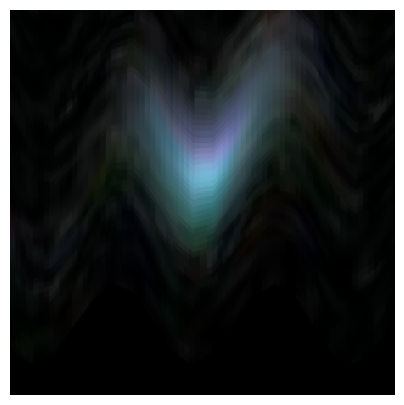

In [166]:
ruta = '/home/luiscantero/Hola/Python/deep_learning/Neural_Networks_and_Deep_Learning/W2_A2/train_galaxies/0_Smooth, in-between round.png'    
image = cv2.imread(ruta)
image = seno_imagen1(image, 60, 8, 'nombre')

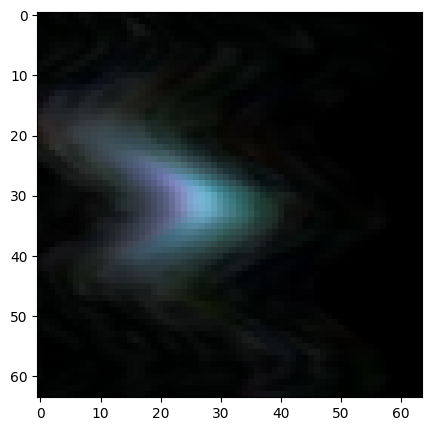

In [167]:
Rotated_image = imutils.rotate(image, angle=90)
Rotated_image = cv2.resize(Rotated_image, (64, 64), interpolation = cv2.INTER_AREA)
plt.imshow(Rotated_image)
plt.rcParams ["figure.figsize"] = (5,5)
plt.show()


In [168]:
images, labels = galaxy10.load_data()

/home/luiscantero/.astroNN/datasets/Galaxy10.h5 was found!


In [169]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

features = ['Disk, Face-on, No Spiral', 'Smooth, Completely round', 'Smooth, in-between round', 'Smooth, Cigar shaped', 'Disk, Edge-on, Rounded Bulge', 'Disk, Edge-on, Boxy Bulge', 
            'Disk, Edge-on, No Bulge','Disk, Face-on, Tight Spiral', 'Disk, Face-on, Medium Spiral', 'Disk, Face-on, Loose Spiral']


In [170]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((17428, 69, 69, 3), (4357, 69, 69, 3), (17428,), (4357,))

In [171]:
# guardar los datos de entrenamiento
# for i in range(0, 400): #len(x_train)//2):
#     plt.axis('off')
#     plt.rcParams ["figure.figsize"] = (10,10)
#     plt.imshow(x_train[i])
#     name = str(features[y_train[i]])
#     images = f'/home/luiscantero/Hola/Python/deep_learning/W2_A2/train_galaxies/' + str(i) + '_' + name + '.png'
#     plt.savefig(images, bbox_inches='tight',pad_inches = 0, dpi=28.3)
    
#     lentes 
#     nombre1 = f'/home/luiscantero/Hola/Python/deep_learning/W2_A2/train_galaxies_lens/' + str(i) + '_A_' + name + '.png'
#     lente_imagen(x_train[i], 60, 8, nombre1)
#     nombre1 = f'/home/luiscantero/Hola/Python/deep_learning/W2_A2/train_galaxies_lens/' + str(i) + '_B_' + name + '.png'
#     lente_imagen(x_train[i], 40, 8, nombre1)
#     nombre1 = f'/home/luiscantero/Hola/Python/deep_learning/W2_A2/train_galaxies_lens/' + str(i) + '_C_' + name + '.png'
#     lente_imagen(x_train[i], 20, 8, nombre1)
#     nombre1 = f'/home/luiscantero/Hola/Python/deep_learning/W2_A2/train_galaxies_lens/' + str(i) + '_D_' + name + '.png'
#     lente_imagen(x_train[i], 60, 10, nombre1)
#     nombre1 = f'/home/luiscantero/Hola/Python/deep_learning/W2_A2/train_galaxies_lens/' + str(i) + '_E_' + name + '.png'
#     lente_imagen(x_train[i], 40, 10, nombre1)
#     nombre1 = f'/home/luiscantero/Hola/Python/deep_learning/W2_A2/train_galaxies_lens/' + str(i) + '_F_' + name + '.png'
#     lente_imagen(x_train[i], 20, 10, nombre1)    
    
#     plt.show()

In [172]:
# guardar los datos de prueba
# for i in range(0, 250): #len(x_test)//2):
#     plt.axis('off')
#     plt.imshow(x_test[i])
#     name = str(features[y_test[i]])
#     images = f'/home/luiscantero/Hola/Python/deep_learning/W2_A2/test_galaxies/' + str(i) + '_' + name + '.png'
#     plt.savefig(images, bbox_inches='tight',pad_inches = 0, dpi=56.4)
    
#     #lentes 
#     nombre1 = f'/home/luiscantero/Hola/Python/deep_learning/W2_A2/test_galaxies_lens/' + str(i) + '_A_' + name + '.png'
#     lente_imagen(x_test[i], 55, 7, nombre1)
#     nombre1 = f'/home/luiscantero/Hola/Python/deep_learning/W2_A2/test_galaxies_lens/' + str(i) + '_B_' + name + '.png'
#     lente_imagen(x_test[i], 35, 7, nombre1)
#     nombre1 = f'/home/luiscantero/Hola/Python/deep_learning/W2_A2/test_galaxies_lens/' + str(i) + '_C_' + name + '.png'
#     lente_imagen(x_test[i], 15, 7, nombre1)
#     nombre1 = f'/home/luiscantero/Hola/Python/deep_learning/W2_A2/test_galaxies_lens/' + str(i) + '_D_' + name + '.png'
#     lente_imagen(x_test[i], 55, 11, nombre1)
#     nombre1 = f'/home/luiscantero/Hola/Python/deep_learning/W2_A2/test_galaxies_lens/' + str(i) + '_E_' + name + '.png'
#     lente_imagen(x_test[i], 35, 11, nombre1)
#     nombre1 = f'/home/luiscantero/Hola/Python/deep_learning/W2_A2/test_galaxies_lens/' + str(i) + '_F_' + name + '.png'
#     lente_imagen(x_test[i], 15, 11, nombre1)       
    
    #plt.show()

In [173]:
n_pixeles=64
dimens = (n_pixeles, n_pixeles)

0_Smooth, in-between round.png
1000_Disk, Face-on, No Spiral.png
1001_Smooth, in-between round.png
1002_Smooth, Completely round.png
1003_Smooth, Completely round.png
1004_Smooth, Completely round.png
1005_Smooth, Completely round.png
1006_Disk, Face-on, No Spiral.png
1007_Smooth, Completely round.png
1008_Smooth, in-between round.png
1009_Disk, Face-on, Tight Spiral.png
100_Smooth, Completely round.png
1010_Smooth, Completely round.png
1011_Smooth, in-between round.png
1012_Disk, Face-on, Loose Spiral.png
1013_Smooth, in-between round.png
1014_Disk, Edge-on, Rounded Bulge.png
1015_Smooth, in-between round.png
1016_Smooth, Completely round.png
1017_Smooth, Completely round.png
1018_Disk, Face-on, No Spiral.png
1019_Smooth, in-between round.png
101_Smooth, Completely round.png
1020_Smooth, in-between round.png
1021_Smooth, Completely round.png
1022_Smooth, Cigar shaped.png
1023_Smooth, in-between round.png
1024_Smooth, in-between round.png
1025_Disk, Face-on, No Spiral.png
1026_Smooth, 

1271_Smooth, Cigar shaped.png
1272_Disk, Face-on, No Spiral.png
1273_Smooth, Completely round.png
1274_Smooth, Completely round.png
1275_Disk, Face-on, No Spiral.png
1276_Smooth, in-between round.png
1277_Smooth, Completely round.png
1278_Disk, Face-on, No Spiral.png
1279_Smooth, Completely round.png
127_Disk, Edge-on, Rounded Bulge.png
1280_Smooth, Completely round.png
1281_Smooth, Completely round.png
1282_Disk, Face-on, Medium Spiral.png
1283_Smooth, Completely round.png
1284_Smooth, Completely round.png
1285_Disk, Edge-on, Rounded Bulge.png
1286_Smooth, Completely round.png
1287_Disk, Face-on, No Spiral.png
1288_Smooth, Completely round.png
1289_Smooth, Completely round.png
128_Smooth, Cigar shaped.png
1290_Smooth, Cigar shaped.png
1291_Disk, Face-on, No Spiral.png
1292_Disk, Face-on, No Spiral.png
1293_Smooth, in-between round.png
1294_Smooth, in-between round.png
1295_Smooth, in-between round.png
1296_Smooth, Completely round.png
1297_Smooth, Completely round.png
1298_Disk, Face-

1530_Disk, Face-on, Medium Spiral.png
1531_Smooth, Completely round.png
1532_Smooth, in-between round.png
1533_Disk, Edge-on, Rounded Bulge.png
1534_Smooth, in-between round.png
1535_Disk, Face-on, Tight Spiral.png
1536_Disk, Face-on, No Spiral.png
1537_Disk, Face-on, No Spiral.png
1538_Smooth, in-between round.png
1539_Disk, Face-on, Tight Spiral.png
153_Smooth, in-between round.png
1540_Smooth, in-between round.png
1541_Disk, Face-on, No Spiral.png
1542_Smooth, Completely round.png
1543_Smooth, in-between round.png
1544_Disk, Face-on, No Spiral.png
1545_Smooth, in-between round.png
1546_Smooth, Completely round.png
1547_Disk, Face-on, No Spiral.png
1548_Smooth, Completely round.png
1549_Smooth, Completely round.png
154_Smooth, in-between round.png
1550_Disk, Face-on, No Spiral.png
1551_Smooth, Completely round.png
1552_Smooth, Completely round.png
1553_Disk, Face-on, Tight Spiral.png
1554_Smooth, Cigar shaped.png
1555_Disk, Face-on, Loose Spiral.png
1556_Smooth, in-between round.png


177_Smooth, in-between round.png
1780_Smooth, in-between round.png
1781_Smooth, in-between round.png
1782_Disk, Face-on, No Spiral.png
1783_Disk, Face-on, No Spiral.png
1784_Smooth, in-between round.png
1785_Smooth, in-between round.png
1786_Smooth, Completely round.png
1787_Smooth, Cigar shaped.png
1788_Disk, Edge-on, No Bulge.png
1789_Smooth, Completely round.png
178_Smooth, Completely round.png
1790_Smooth, in-between round.png
1791_Smooth, Completely round.png
1792_Smooth, Completely round.png
1793_Disk, Face-on, Tight Spiral.png
1794_Smooth, in-between round.png
1795_Disk, Face-on, Loose Spiral.png
1796_Smooth, in-between round.png
1797_Disk, Edge-on, Rounded Bulge.png
1798_Smooth, Completely round.png
1799_Smooth, in-between round.png
179_Disk, Face-on, No Spiral.png
17_Disk, Edge-on, Rounded Bulge.png
1800_Smooth, Completely round.png
1801_Disk, Edge-on, Rounded Bulge.png
1802_Smooth, in-between round.png
1803_Disk, Face-on, Medium Spiral.png
1804_Smooth, in-between round.png
18

2001_Disk, Face-on, Medium Spiral.png
2002_Smooth, in-between round.png
2003_Disk, Face-on, No Spiral.png
2004_Smooth, in-between round.png
2005_Disk, Face-on, No Spiral.png
2006_Smooth, in-between round.png
2007_Smooth, in-between round.png
2008_Disk, Face-on, No Spiral.png
2009_Disk, Face-on, Medium Spiral.png
200_Smooth, in-between round.png
2010_Smooth, in-between round.png
2011_Smooth, Completely round.png
2012_Smooth, Completely round.png
2013_Disk, Face-on, Medium Spiral.png
2014_Smooth, Cigar shaped.png
2015_Disk, Face-on, No Spiral.png
2016_Smooth, Completely round.png
2017_Disk, Face-on, Tight Spiral.png
2018_Smooth, Completely round.png
2019_Disk, Edge-on, Rounded Bulge.png
201_Smooth, Completely round.png
2020_Smooth, Completely round.png
2021_Smooth, Completely round.png
2022_Disk, Face-on, Medium Spiral.png
2023_Smooth, in-between round.png
2024_Disk, Face-on, No Spiral.png
2025_Smooth, Completely round.png
2026_Smooth, in-between round.png
2027_Smooth, in-between round.p

25_Smooth, Completely round.png
260_Smooth, Completely round.png
261_Smooth, Completely round.png
262_Smooth, in-between round.png
263_Smooth, in-between round.png
264_Disk, Face-on, Medium Spiral.png
265_Smooth, in-between round.png
266_Smooth, in-between round.png
267_Disk, Face-on, No Spiral.png
268_Smooth, Cigar shaped.png
269_Smooth, Cigar shaped.png
26_Smooth, Completely round.png
270_Smooth, Completely round.png
271_Smooth, Completely round.png
272_Smooth, in-between round.png
273_Smooth, in-between round.png
274_Smooth, Completely round.png
275_Disk, Edge-on, No Bulge.png
276_Disk, Face-on, Loose Spiral.png
277_Smooth, Completely round.png
278_Disk, Face-on, No Spiral.png
279_Smooth, Completely round.png
27_Smooth, in-between round.png
280_Smooth, in-between round.png
281_Smooth, Completely round.png
282_Disk, Face-on, No Spiral.png
283_Disk, Face-on, Tight Spiral.png
284_Smooth, in-between round.png
285_Smooth, in-between round.png
286_Smooth, Completely round.png
287_Disk, Fa

504_Smooth, in-between round.png
505_Smooth, Completely round.png
506_Disk, Face-on, No Spiral.png
507_Smooth, Completely round.png
508_Disk, Face-on, Tight Spiral.png
509_Smooth, Completely round.png
50_Smooth, Completely round.png
510_Smooth, in-between round.png
511_Disk, Face-on, Medium Spiral.png
512_Disk, Edge-on, No Bulge.png
513_Disk, Face-on, Tight Spiral.png
514_Smooth, in-between round.png
515_Disk, Face-on, No Spiral.png
516_Smooth, Completely round.png
517_Smooth, Completely round.png
518_Smooth, in-between round.png
519_Smooth, in-between round.png
51_Smooth, in-between round.png
520_Smooth, Completely round.png
521_Disk, Face-on, Medium Spiral.png
522_Smooth, in-between round.png
523_Smooth, Completely round.png
524_Disk, Face-on, No Spiral.png
525_Smooth, in-between round.png
526_Smooth, in-between round.png
527_Smooth, Completely round.png
528_Disk, Edge-on, Rounded Bulge.png
529_Smooth, Cigar shaped.png
52_Smooth, in-between round.png
530_Smooth, in-between round.png


746_Disk, Edge-on, No Bulge.png
747_Smooth, in-between round.png
748_Disk, Face-on, No Spiral.png
749_Smooth, Completely round.png
74_Smooth, in-between round.png
750_Smooth, in-between round.png
751_Smooth, Completely round.png
752_Smooth, Completely round.png
753_Smooth, Completely round.png
754_Smooth, in-between round.png
755_Disk, Face-on, No Spiral.png
756_Smooth, in-between round.png
757_Disk, Face-on, No Spiral.png
758_Disk, Face-on, No Spiral.png
759_Disk, Face-on, No Spiral.png
75_Disk, Edge-on, Rounded Bulge.png
760_Smooth, Completely round.png
761_Smooth, in-between round.png
762_Smooth, in-between round.png
763_Disk, Edge-on, Rounded Bulge.png
764_Disk, Face-on, No Spiral.png
765_Smooth, in-between round.png
766_Disk, Edge-on, Rounded Bulge.png
767_Smooth, Cigar shaped.png
768_Smooth, Completely round.png
769_Disk, Face-on, Tight Spiral.png
76_Smooth, Completely round.png
770_Disk, Face-on, Tight Spiral.png
771_Smooth, Completely round.png
772_Smooth, Completely round.png


985_Smooth, in-between round.png
986_Smooth, in-between round.png
987_Smooth, Completely round.png
988_Disk, Edge-on, Rounded Bulge.png
989_Smooth, Completely round.png
98_Smooth, Completely round.png
990_Smooth, in-between round.png
991_Smooth, Completely round.png
992_Disk, Face-on, Tight Spiral.png
993_Smooth, Completely round.png
994_Smooth, Completely round.png
995_Smooth, Completely round.png
996_Smooth, in-between round.png
997_Smooth, Completely round.png
998_Disk, Face-on, No Spiral.png
999_Disk, Face-on, No Spiral.png
99_Smooth, Completely round.png
9_Disk, Face-on, No Spiral.png
250.png
251.png
252.png
253.png
254.png
255.png
256.png
257.png
258.png
259.png
260.png
261.png
262.png
263.png
264.png
265.png
266.png
267.png
268.png
269.png
270.png
271.png
272.png
273.png
274.png
275.png
276.png
277.png
278.png
279.png
280.png
281.png
282.png
283.png
284.png
285.png
286.png
287.png
288.png
289.png
290.png
291.png
292.png
293.png
294.png
295.png
296.png
297.png
298.png
299.png
300

1073.pngflip_0.jpg
1073.pngflip_1.jpg
1073.pngrot_45.jpg
1073.pngrot_90.jpg
1074.png
1074.pngflip_0.jpg
1074.pngflip_1.jpg
1074.pngrot_45.jpg
1074.pngrot_90.jpg
1075.png
1075.pngflip_0.jpg
1075.pngflip_1.jpg
1075.pngrot_45.jpg
1075.pngrot_90.jpg
1076.png
1076.pngflip_0.jpg
1076.pngflip_1.jpg
1076.pngrot_45.jpg
1076.pngrot_90.jpg
1077.png
1077.pngflip_0.jpg
1077.pngflip_1.jpg
1077.pngrot_45.jpg
1077.pngrot_90.jpg
1078.png
1078.pngflip_0.jpg
1078.pngflip_1.jpg
1078.pngrot_45.jpg
1078.pngrot_90.jpg
1079.png
1079.pngflip_0.jpg
1079.pngflip_1.jpg
1079.pngrot_45.jpg
1079.pngrot_90.jpg
1080.png
1080.pngflip_0.jpg
1080.pngflip_1.jpg
1080.pngrot_45.jpg
1080.pngrot_90.jpg
1081.png
1081.pngflip_0.jpg
1081.pngflip_1.jpg
1081.pngrot_45.jpg
1081.pngrot_90.jpg
1082.png
1082.pngflip_0.jpg
1082.pngflip_1.jpg
1082.pngrot_45.jpg
1082.pngrot_90.jpg
1083.png
1083.pngflip_0.jpg
1083.pngflip_1.jpg
1083.pngrot_45.jpg
1083.pngrot_90.jpg
1084.png
1084.pngflip_0.jpg
1084.pngflip_1.jpg
1084.pngrot_45.jpg
1084.png

125_D_Disk, Face-on, No Spiral.png
125_E_Disk, Face-on, No Spiral.png
125_F_Disk, Face-on, No Spiral.png
126_A_Smooth, in-between round.png
126_B_Smooth, in-between round.png
126_C_Smooth, in-between round.png
126_D_Smooth, in-between round.png
126_E_Smooth, in-between round.png
126_F_Smooth, in-between round.png
127_A_Smooth, in-between round.png
127_B_Smooth, in-between round.png
127_C_Smooth, in-between round.png
127_D_Smooth, in-between round.png
127_E_Smooth, in-between round.png
127_F_Smooth, in-between round.png
128_A_Disk, Face-on, Loose Spiral.png
128_B_Disk, Face-on, Loose Spiral.png
128_C_Disk, Face-on, Loose Spiral.png
128_D_Disk, Face-on, Loose Spiral.png
128_E_Disk, Face-on, Loose Spiral.png
128_F_Disk, Face-on, Loose Spiral.png
129_A_Smooth, in-between round.png
129_B_Smooth, in-between round.png
129_C_Smooth, in-between round.png
129_D_Smooth, in-between round.png
129_E_Smooth, in-between round.png
129_F_Smooth, in-between round.png
12_A_Smooth, in-between round.png
12_

160_C_Smooth, Completely round.png
160_D_Smooth, Completely round.png
160_E_Smooth, Completely round.png
160_F_Smooth, Completely round.png
161_A_Disk, Face-on, Medium Spiral.png
161_B_Disk, Face-on, Medium Spiral.png
161_C_Disk, Face-on, Medium Spiral.png
161_D_Disk, Face-on, Medium Spiral.png
161_E_Disk, Face-on, Medium Spiral.png
161_F_Disk, Face-on, Medium Spiral.png
162_A_Smooth, in-between round.png
162_B_Smooth, in-between round.png
162_C_Smooth, in-between round.png
162_D_Smooth, in-between round.png
162_E_Smooth, in-between round.png
162_F_Smooth, in-between round.png
163_A_Smooth, in-between round.png
163_B_Smooth, in-between round.png
163_C_Smooth, in-between round.png
163_D_Smooth, in-between round.png
163_E_Smooth, in-between round.png
163_F_Smooth, in-between round.png
164_A_Smooth, Completely round.png
164_B_Smooth, Completely round.png
164_C_Smooth, Completely round.png
164_D_Smooth, Completely round.png
164_E_Smooth, Completely round.png
164_F_Smooth, Completely round.

195_C_Disk, Face-on, Tight Spiral.png
195_D_Disk, Face-on, Tight Spiral.png
195_E_Disk, Face-on, Tight Spiral.png
195_F_Disk, Face-on, Tight Spiral.png
196_A_Smooth, Completely round.png
196_B_Smooth, Completely round.png
196_C_Smooth, Completely round.png
196_D_Smooth, Completely round.png
196_E_Smooth, Completely round.png
196_F_Smooth, Completely round.png
197_A_Smooth, Cigar shaped.png
197_B_Smooth, Cigar shaped.png
197_C_Smooth, Cigar shaped.png
197_D_Smooth, Cigar shaped.png
197_E_Smooth, Cigar shaped.png
197_F_Smooth, Cigar shaped.png
198_A_Disk, Face-on, No Spiral.png
198_B_Disk, Face-on, No Spiral.png
198_C_Disk, Face-on, No Spiral.png
198_D_Disk, Face-on, No Spiral.png
198_E_Disk, Face-on, No Spiral.png
198_F_Disk, Face-on, No Spiral.png
199_A_Smooth, Completely round.png
199_B_Smooth, Completely round.png
199_C_Smooth, Completely round.png
199_D_Smooth, Completely round.png
199_E_Smooth, Completely round.png
199_F_Smooth, Completely round.png
19_A_Disk, Face-on, No Spiral.pn

22_D_Disk, Face-on, No Spiral.png
22_E_Disk, Face-on, No Spiral.png
22_F_Disk, Face-on, No Spiral.png
230_A_Smooth, in-between round.png
230_B_Smooth, in-between round.png
230_C_Smooth, in-between round.png
230_D_Smooth, in-between round.png
230_E_Smooth, in-between round.png
230_F_Smooth, in-between round.png
231_A_Disk, Edge-on, Rounded Bulge.png
231_B_Disk, Edge-on, Rounded Bulge.png
231_C_Disk, Edge-on, Rounded Bulge.png
231_D_Disk, Edge-on, Rounded Bulge.png
231_E_Disk, Edge-on, Rounded Bulge.png
231_F_Disk, Edge-on, Rounded Bulge.png
232_A_Smooth, in-between round.png
232_B_Smooth, in-between round.png
232_C_Smooth, in-between round.png
232_D_Smooth, in-between round.png
232_E_Smooth, in-between round.png
232_F_Smooth, in-between round.png
233_A_Smooth, in-between round.png
233_B_Smooth, in-between round.png
233_C_Smooth, in-between round.png
233_D_Smooth, in-between round.png
233_E_Smooth, in-between round.png
233_F_Smooth, in-between round.png
234_A_Smooth, in-between round.png

265_B_Smooth, Completely round.png
265_C_Smooth, Completely round.png
265_D_Smooth, Completely round.png
265_E_Smooth, Completely round.png
265_F_Smooth, Completely round.png
266_A_Disk, Face-on, No Spiral.png
266_B_Disk, Face-on, No Spiral.png
266_C_Disk, Face-on, No Spiral.png
266_D_Disk, Face-on, No Spiral.png
266_E_Disk, Face-on, No Spiral.png
266_F_Disk, Face-on, No Spiral.png
267_A_Smooth, Completely round.png
267_B_Smooth, Completely round.png
267_C_Smooth, Completely round.png
267_D_Smooth, Completely round.png
267_E_Smooth, Completely round.png
267_F_Smooth, Completely round.png
268_A_Disk, Edge-on, No Bulge.png
268_B_Disk, Edge-on, No Bulge.png
268_C_Disk, Edge-on, No Bulge.png
268_D_Disk, Edge-on, No Bulge.png
268_E_Disk, Edge-on, No Bulge.png
268_F_Disk, Edge-on, No Bulge.png
269_A_Smooth, in-between round.png
269_B_Smooth, in-between round.png
269_C_Smooth, in-between round.png
269_D_Smooth, in-between round.png
269_E_Smooth, in-between round.png
269_F_Smooth, in-between r

2_A_Disk, Face-on, Medium Spiral.png
2_B_Disk, Face-on, Medium Spiral.png
2_C_Disk, Face-on, Medium Spiral.png
2_D_Disk, Face-on, Medium Spiral.png
2_E_Disk, Face-on, Medium Spiral.png
2_F_Disk, Face-on, Medium Spiral.png
300_A_Disk, Face-on, Medium Spiral.png
300_B_Disk, Face-on, Medium Spiral.png
300_C_Disk, Face-on, Medium Spiral.png
300_D_Disk, Face-on, Medium Spiral.png
300_E_Disk, Face-on, Medium Spiral.png
300_F_Disk, Face-on, Medium Spiral.png
301_A_Smooth, Completely round.png
301_B_Smooth, Completely round.png
301_C_Smooth, Completely round.png
301_D_Smooth, Completely round.png
301_E_Smooth, Completely round.png
301_F_Smooth, Completely round.png
302_A_Disk, Face-on, No Spiral.png
302_B_Disk, Face-on, No Spiral.png
302_C_Disk, Face-on, No Spiral.png
302_D_Disk, Face-on, No Spiral.png
302_E_Disk, Face-on, No Spiral.png
302_F_Disk, Face-on, No Spiral.png
303_A_Smooth, Completely round.png
303_B_Smooth, Completely round.png
303_C_Smooth, Completely round.png
303_D_Smooth, Compl

335_A_Smooth, in-between round.png
335_B_Smooth, in-between round.png
335_C_Smooth, in-between round.png
335_D_Smooth, in-between round.png
335_E_Smooth, in-between round.png
335_F_Smooth, in-between round.png
336_A_Smooth, Completely round.png
336_B_Smooth, Completely round.png
336_C_Smooth, Completely round.png
336_D_Smooth, Completely round.png
336_E_Smooth, Completely round.png
336_F_Smooth, Completely round.png
337_A_Smooth, Completely round.png
337_B_Smooth, Completely round.png
337_C_Smooth, Completely round.png
337_D_Smooth, Completely round.png
337_E_Smooth, Completely round.png
337_F_Smooth, Completely round.png
338_A_Smooth, Completely round.png
338_B_Smooth, Completely round.png
338_C_Smooth, Completely round.png
338_D_Smooth, Completely round.png
338_E_Smooth, Completely round.png
338_F_Smooth, Completely round.png
339_A_Disk, Face-on, No Spiral.png
339_B_Disk, Face-on, No Spiral.png
339_C_Disk, Face-on, No Spiral.png
339_D_Disk, Face-on, No Spiral.png
339_E_Disk, Face-on,

36_F_Smooth, Completely round.png
370_A_Smooth, Completely round.png
370_B_Smooth, Completely round.png
370_C_Smooth, Completely round.png
370_D_Smooth, Completely round.png
370_E_Smooth, Completely round.png
370_F_Smooth, Completely round.png
371_A_Disk, Edge-on, No Bulge.png
371_B_Disk, Edge-on, No Bulge.png
371_C_Disk, Edge-on, No Bulge.png
371_D_Disk, Edge-on, No Bulge.png
371_E_Disk, Edge-on, No Bulge.png
371_F_Disk, Edge-on, No Bulge.png
372_A_Smooth, Completely round.png
372_B_Smooth, Completely round.png
372_C_Smooth, Completely round.png
372_D_Smooth, Completely round.png
372_E_Smooth, Completely round.png
372_F_Smooth, Completely round.png
373_A_Smooth, in-between round.png
373_B_Smooth, in-between round.png
373_C_Smooth, in-between round.png
373_D_Smooth, in-between round.png
373_E_Smooth, in-between round.png
373_F_Smooth, in-between round.png
374_A_Smooth, in-between round.png
374_B_Smooth, in-between round.png
374_C_Smooth, in-between round.png
374_D_Smooth, in-between ro

44_D_Disk, Face-on, Medium Spiral.png
44_E_Disk, Face-on, Medium Spiral.png
44_F_Disk, Face-on, Medium Spiral.png
45_A_Smooth, Cigar shaped.png
45_B_Smooth, Cigar shaped.png
45_C_Smooth, Cigar shaped.png
45_D_Smooth, Cigar shaped.png
45_E_Smooth, Cigar shaped.png
45_F_Smooth, Cigar shaped.png
46_A_Disk, Face-on, No Spiral.png
46_B_Disk, Face-on, No Spiral.png
46_C_Disk, Face-on, No Spiral.png
46_D_Disk, Face-on, No Spiral.png
46_E_Disk, Face-on, No Spiral.png
46_F_Disk, Face-on, No Spiral.png
47_A_Smooth, Completely round.png
47_B_Smooth, Completely round.png
47_C_Smooth, Completely round.png
47_D_Smooth, Completely round.png
47_E_Smooth, Completely round.png
47_F_Smooth, Completely round.png
48_A_Smooth, in-between round.png
48_B_Smooth, in-between round.png
48_C_Smooth, in-between round.png
48_D_Smooth, in-between round.png
48_E_Smooth, in-between round.png
48_F_Smooth, in-between round.png
49_A_Smooth, Completely round.png
49_B_Smooth, Completely round.png
49_C_Smooth, Completely ro

80_E_Smooth, Completely round.png
80_F_Smooth, Completely round.png
81_A_Smooth, in-between round.png
81_B_Smooth, in-between round.png
81_C_Smooth, in-between round.png
81_D_Smooth, in-between round.png
81_E_Smooth, in-between round.png
81_F_Smooth, in-between round.png
82_A_Smooth, in-between round.png
82_B_Smooth, in-between round.png
82_C_Smooth, in-between round.png
82_D_Smooth, in-between round.png
82_E_Smooth, in-between round.png
82_F_Smooth, in-between round.png
83_A_Smooth, Completely round.png
83_B_Smooth, Completely round.png
83_C_Smooth, Completely round.png
83_D_Smooth, Completely round.png
83_E_Smooth, Completely round.png
83_F_Smooth, Completely round.png
84_A_Disk, Face-on, Tight Spiral.png
84_B_Disk, Face-on, Tight Spiral.png
84_C_Disk, Face-on, Tight Spiral.png
84_D_Disk, Face-on, Tight Spiral.png
84_E_Disk, Face-on, Tight Spiral.png
84_F_Disk, Face-on, Tight Spiral.png
85_A_Smooth, Cigar shaped.png
85_B_Smooth, Cigar shaped.png
85_C_Smooth, Cigar shaped.png
85_D_Smo

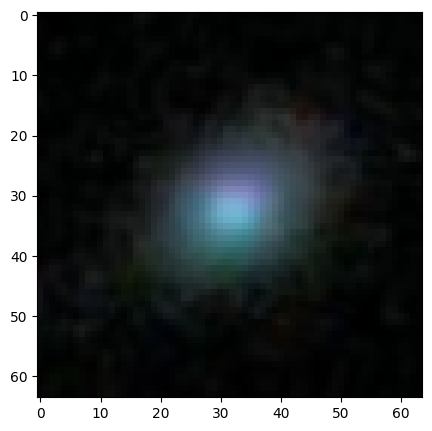

In [174]:
# Crear un solo arreglo de todas las imagenes dentro de las carpetas TRAIN
image1 = cv2.imread('/home/luiscantero/Hola/Python/deep_learning/Neural_Networks_and_Deep_Learning/W2_A2/train_galaxies/0_Smooth, in-between round.png')
image1 = cv2.resize(image1, dimens, interpolation = cv2.INTER_AREA)
image2 = cv2.imread('/home/luiscantero/Hola/Python/deep_learning/Neural_Networks_and_Deep_Learning/W2_A2/train_galaxies/1000_Disk, Face-on, No Spiral.png')
image2 = cv2.resize(image2, dimens, interpolation = cv2.INTER_AREA)

train_set_x_orig_2 = np.append(image1 , image1)
train_set_x_orig_2.shape

basepath = '/home/luiscantero/Hola/Python/deep_learning/Neural_Networks_and_Deep_Learning/W2_A2/train_galaxies/'

i = 0
with os.scandir(basepath) as entries:
    for entry in entries:
        if entry.is_file():
            print(str(entry.name))
            if(i > 1):
                name = f'/home/luiscantero/Hola/Python/deep_learning/Neural_Networks_and_Deep_Learning/W2_A2/train_galaxies/' + str(entry.name)
                image1 = cv2.imread(name)
                image1 = cv2.resize(image1, dimens, interpolation = cv2.INTER_AREA)
                imaget = train_set_x_orig_2
                train_set_x_orig_2 = np.append(imaget , image1)
        i = i+1
        
basepath2 = '/home/luiscantero/Hola/Python/deep_learning/Neural_Networks_and_Deep_Learning/W2_A2/train_galaxies_lsst/'
        
with os.scandir(basepath2) as entries:
    for entry in entries:
        if entry.is_file():
            print(str(entry.name))
            name = f'/home/luiscantero/Hola/Python/deep_learning/Neural_Networks_and_Deep_Learning/W2_A2/train_galaxies_lsst/' + str(entry.name)
            image1 = cv2.imread(name)
            image1 = cv2.resize(image1, dimens, interpolation = cv2.INTER_AREA)
            imaget = train_set_x_orig_2
            train_set_x_orig_2 = np.append(imaget , image1)  
            
basepath3 = '/home/luiscantero/Hola/Python/deep_learning/Neural_Networks_and_Deep_Learning/W2_A2/train_galaxies_lsst_2/'
        
with os.scandir(basepath3) as entries:
    for entry in entries:
        if entry.is_file():
            print(str(entry.name))
            name = f'/home/luiscantero/Hola/Python/deep_learning/Neural_Networks_and_Deep_Learning/W2_A2/train_galaxies_lsst_2/' + str(entry.name)
            image1 = cv2.imread(name)
            image1 = cv2.resize(image1, dimens, interpolation = cv2.INTER_AREA)
            imaget = train_set_x_orig_2
            train_set_x_orig_2 = np.append(imaget , image1)              

            
basepath4 = '/home/luiscantero/Hola/Python/deep_learning/Neural_Networks_and_Deep_Learning/W2_A2/train_galaxies_lens/'
        
with os.scandir(basepath4) as entries:
    for entry in entries:
        if entry.is_file():
            print(str(entry.name))
            name = f'/home/luiscantero/Hola/Python/deep_learning/Neural_Networks_and_Deep_Learning/W2_A2/train_galaxies_lens/' + str(entry.name)
            image1 = cv2.imread(name)
            image1 = cv2.resize(image1, dimens, interpolation = cv2.INTER_AREA)
            imaget = train_set_x_orig_2
            train_set_x_orig_2 = np.append(imaget , image1)
            
basepath5 = '/home/luiscantero/Hola/Python/deep_learning/Neural_Networks_and_Deep_Learning/W2_A2/train_galaxies_lsst_lens/'
        
with os.scandir(basepath5) as entries:
    for entry in entries:
        if entry.is_file():
            print(str(entry.name))
            name = f'/home/luiscantero/Hola/Python/deep_learning/Neural_Networks_and_Deep_Learning/W2_A2/train_galaxies_lsst_lens/' + str(entry.name)
            image1 = cv2.imread(name)
            image1 = cv2.resize(image1, dimens, interpolation = cv2.INTER_AREA)
            imaget = train_set_x_orig_2
            train_set_x_orig_2 = np.append(imaget , image1)            
      

p2 = train_set_x_orig_2.shape[0]/(n_pixeles*n_pixeles*3) 
r2 = int(p2)
plt.imshow(train_set_x_orig_2.reshape(r2, n_pixeles, n_pixeles, 3)[0])

0_Smooth, in-between round.png
1000_Disk, Edge-on, Rounded Bulge.png
1001_Disk, Face-on, No Spiral.png
1002_Smooth, in-between round.png
1003_Smooth, Completely round.png
1004_Smooth, Completely round.png
1005_Smooth, in-between round.png
1006_Smooth, Completely round.png
1007_Smooth, Completely round.png
1008_Smooth, Completely round.png
1009_Smooth, Completely round.png
100_Disk, Face-on, No Spiral.png
1010_Disk, Edge-on, Rounded Bulge.png
1011_Disk, Face-on, No Spiral.png
1012_Smooth, Completely round.png
1013_Smooth, in-between round.png
1014_Smooth, Completely round.png
1015_Disk, Face-on, No Spiral.png
1016_Smooth, in-between round.png
1017_Disk, Face-on, No Spiral.png
1018_Disk, Face-on, Loose Spiral.png
1019_Disk, Edge-on, Rounded Bulge.png
101_Smooth, Completely round.png
1020_Smooth, in-between round.png
1021_Disk, Face-on, Medium Spiral.png
1022_Smooth, Cigar shaped.png
1023_Smooth, in-between round.png
1024_Smooth, Completely round.png
1025_Disk, Edge-on, Rounded Bulge.png


1237_Smooth, Completely round.png
1238_Disk, Edge-on, Rounded Bulge.png
1239_Smooth, Completely round.png
123_Smooth, Completely round.png
1240_Disk, Edge-on, Rounded Bulge.png
1241_Smooth, in-between round.png
1242_Smooth, Completely round.png
1243_Smooth, Cigar shaped.png
1244_Disk, Face-on, No Spiral.png
1245_Disk, Face-on, No Spiral.png
1246_Smooth, Completely round.png
1247_Smooth, in-between round.png
1248_Smooth, in-between round.png
1249_Smooth, Completely round.png
124_Smooth, in-between round.png
1250_Smooth, in-between round.png
1251_Disk, Face-on, No Spiral.png
1252_Smooth, in-between round.png
1253_Disk, Edge-on, No Bulge.png
1254_Disk, Face-on, Medium Spiral.png
1255_Disk, Face-on, Tight Spiral.png
1256_Disk, Face-on, No Spiral.png
1257_Smooth, in-between round.png
1258_Smooth, Completely round.png
1259_Smooth, in-between round.png
125_Disk, Face-on, Tight Spiral.png
1260_Smooth, Completely round.png
1261_Disk, Face-on, No Spiral.png
1262_Smooth, Completely round.png
1263

1473_Disk, Face-on, Tight Spiral.png
1474_Disk, Face-on, Tight Spiral.png
1475_Disk, Face-on, No Spiral.png
1476_Disk, Edge-on, No Bulge.png
1477_Disk, Face-on, No Spiral.png
1478_Smooth, in-between round.png
1479_Smooth, in-between round.png
147_Smooth, in-between round.png
1480_Smooth, Completely round.png
1481_Disk, Face-on, No Spiral.png
1482_Disk, Face-on, No Spiral.png
1483_Disk, Face-on, No Spiral.png
1484_Smooth, in-between round.png
1485_Smooth, in-between round.png
1486_Smooth, in-between round.png
1487_Smooth, Cigar shaped.png
1488_Smooth, Completely round.png
1489_Disk, Edge-on, Rounded Bulge.png
148_Smooth, in-between round.png
1490_Smooth, Completely round.png
1491_Smooth, in-between round.png
1492_Smooth, in-between round.png
1493_Smooth, in-between round.png
1494_Smooth, Completely round.png
1495_Smooth, in-between round.png
1496_Disk, Edge-on, Rounded Bulge.png
1497_Smooth, Completely round.png
1498_Smooth, in-between round.png
1499_Smooth, in-between round.png
149_Dis

344_Smooth, Completely round.png
345_Disk, Edge-on, Rounded Bulge.png
346_Disk, Face-on, No Spiral.png
347_Disk, Face-on, No Spiral.png
348_Smooth, in-between round.png
349_Smooth, in-between round.png
34_Smooth, in-between round.png
350_Smooth, in-between round.png
351_Disk, Edge-on, Rounded Bulge.png
352_Disk, Face-on, Tight Spiral.png
353_Disk, Face-on, No Spiral.png
354_Smooth, Completely round.png
355_Smooth, in-between round.png
356_Disk, Face-on, Medium Spiral.png
357_Smooth, Completely round.png
358_Smooth, Completely round.png
359_Smooth, Completely round.png
35_Smooth, Completely round.png
360_Disk, Face-on, No Spiral.png
361_Disk, Face-on, No Spiral.png
362_Smooth, in-between round.png
363_Smooth, in-between round.png
364_Smooth, in-between round.png
365_Smooth, Completely round.png
366_Smooth, in-between round.png
367_Smooth, in-between round.png
368_Disk, Face-on, No Spiral.png
369_Smooth, Completely round.png
36_Smooth, in-between round.png
370_Disk, Face-on, Medium Spira

592_Disk, Face-on, No Spiral.png
593_Disk, Face-on, No Spiral.png
594_Disk, Face-on, Tight Spiral.png
595_Disk, Edge-on, No Bulge.png
596_Disk, Face-on, Tight Spiral.png
597_Smooth, in-between round.png
598_Disk, Edge-on, No Bulge.png
599_Smooth, in-between round.png
59_Smooth, in-between round.png
5_Smooth, Completely round.png
600_Smooth, in-between round.png
601_Smooth, Completely round.png
602_Smooth, in-between round.png
603_Smooth, Completely round.png
604_Smooth, in-between round.png
605_Smooth, in-between round.png
606_Disk, Face-on, Medium Spiral.png
607_Disk, Face-on, No Spiral.png
608_Smooth, Completely round.png
609_Smooth, Completely round.png
60_Disk, Edge-on, Rounded Bulge.png
610_Smooth, Completely round.png
611_Smooth, Completely round.png
612_Smooth, in-between round.png
613_Smooth, Completely round.png
614_Smooth, in-between round.png
615_Smooth, Completely round.png
616_Disk, Face-on, No Spiral.png
617_Smooth, Completely round.png
618_Disk, Edge-on, Rounded Bulge.pn

827_Smooth, in-between round.png
828_Disk, Face-on, No Spiral.png
829_Smooth, in-between round.png
82_Disk, Face-on, No Spiral.png
830_Smooth, in-between round.png
831_Disk, Face-on, No Spiral.png
832_Disk, Face-on, No Spiral.png
833_Smooth, Completely round.png
834_Disk, Edge-on, No Bulge.png
835_Smooth, in-between round.png
836_Disk, Face-on, No Spiral.png
837_Smooth, in-between round.png
838_Smooth, in-between round.png
839_Smooth, in-between round.png
83_Smooth, in-between round.png
840_Smooth, Completely round.png
841_Smooth, Completely round.png
842_Smooth, in-between round.png
843_Disk, Face-on, Loose Spiral.png
844_Disk, Face-on, No Spiral.png
845_Smooth, Completely round.png
846_Disk, Face-on, No Spiral.png
847_Smooth, Completely round.png
848_Smooth, Completely round.png
849_Disk, Face-on, Medium Spiral.png
84_Smooth, Completely round.png
850_Smooth, Completely round.png
851_Smooth, Completely round.png
852_Smooth, Completely round.png
853_Smooth, Completely round.png
854_Smo

107_D_Smooth, Completely round.png
107_E_Smooth, Completely round.png
107_F_Smooth, Completely round.png
108_A_Smooth, Completely round.png
108_B_Smooth, Completely round.png
108_C_Smooth, Completely round.png
108_D_Smooth, Completely round.png
108_E_Smooth, Completely round.png
108_F_Smooth, Completely round.png
109_A_Smooth, Completely round.png
109_B_Smooth, Completely round.png
109_C_Smooth, Completely round.png
109_D_Smooth, Completely round.png
109_E_Smooth, Completely round.png
109_F_Smooth, Completely round.png
10_A_Smooth, Completely round.png
10_B_Smooth, Completely round.png
10_C_Smooth, Completely round.png
10_D_Smooth, Completely round.png
10_E_Smooth, Completely round.png
10_F_Smooth, Completely round.png
110_A_Smooth, in-between round.png
110_B_Smooth, in-between round.png
110_C_Smooth, in-between round.png
110_D_Smooth, in-between round.png
110_E_Smooth, in-between round.png
110_F_Smooth, in-between round.png
111_A_Disk, Face-on, No Spiral.png
111_B_Disk, Face-on, No Sp

149_D_Disk, Face-on, Loose Spiral.png
149_E_Disk, Face-on, Loose Spiral.png
149_F_Disk, Face-on, Loose Spiral.png
14_A_Smooth, Completely round.png
14_B_Smooth, Completely round.png
14_C_Smooth, Completely round.png
14_D_Smooth, Completely round.png
14_E_Smooth, Completely round.png
14_F_Smooth, Completely round.png
150_A_Disk, Face-on, Medium Spiral.png
150_B_Disk, Face-on, Medium Spiral.png
150_C_Disk, Face-on, Medium Spiral.png
150_D_Disk, Face-on, Medium Spiral.png
150_E_Disk, Face-on, Medium Spiral.png
150_F_Disk, Face-on, Medium Spiral.png
151_A_Smooth, Completely round.png
151_B_Smooth, Completely round.png
151_C_Smooth, Completely round.png
151_D_Smooth, Completely round.png
151_E_Smooth, Completely round.png
151_F_Smooth, Completely round.png
152_A_Smooth, Completely round.png
152_B_Smooth, Completely round.png
152_C_Smooth, Completely round.png
152_D_Smooth, Completely round.png
152_E_Smooth, Completely round.png
152_F_Smooth, Completely round.png
153_A_Smooth, Completely rou

18_F_Smooth, Completely round.png
190_A_Smooth, in-between round.png
190_B_Smooth, in-between round.png
190_C_Smooth, in-between round.png
190_D_Smooth, in-between round.png
190_E_Smooth, in-between round.png
190_F_Smooth, in-between round.png
191_A_Smooth, in-between round.png
191_B_Smooth, in-between round.png
191_C_Smooth, in-between round.png
191_D_Smooth, in-between round.png
191_E_Smooth, in-between round.png
191_F_Smooth, in-between round.png
192_A_Smooth, Completely round.png
192_B_Smooth, Completely round.png
192_C_Smooth, Completely round.png
192_D_Smooth, Completely round.png
192_E_Smooth, Completely round.png
192_F_Smooth, Completely round.png
193_A_Disk, Edge-on, No Bulge.png
193_B_Disk, Edge-on, No Bulge.png
193_C_Disk, Edge-on, No Bulge.png
193_D_Disk, Edge-on, No Bulge.png
193_E_Disk, Edge-on, No Bulge.png
193_F_Disk, Edge-on, No Bulge.png
194_A_Smooth, Completely round.png
194_B_Smooth, Completely round.png
194_C_Smooth, Completely round.png
194_D_Smooth, Completely ro

226_F_Smooth, Completely round.png
227_A_Disk, Face-on, No Spiral.png
227_B_Disk, Face-on, No Spiral.png
227_C_Disk, Face-on, No Spiral.png
227_D_Disk, Face-on, No Spiral.png
227_E_Disk, Face-on, No Spiral.png
227_F_Disk, Face-on, No Spiral.png
228_A_Smooth, in-between round.png
228_B_Smooth, in-between round.png
228_C_Smooth, in-between round.png
228_D_Smooth, in-between round.png
228_E_Smooth, in-between round.png
228_F_Smooth, in-between round.png
229_A_Smooth, Completely round.png
229_B_Smooth, Completely round.png
229_C_Smooth, Completely round.png
229_D_Smooth, Completely round.png
229_E_Smooth, Completely round.png
229_F_Smooth, Completely round.png
22_A_Disk, Face-on, Medium Spiral.png
22_B_Disk, Face-on, Medium Spiral.png
22_C_Disk, Face-on, Medium Spiral.png
22_D_Disk, Face-on, Medium Spiral.png
22_E_Disk, Face-on, Medium Spiral.png
22_F_Disk, Face-on, Medium Spiral.png
230_A_Smooth, Completely round.png
230_B_Smooth, Completely round.png
230_C_Smooth, Completely round.png
23

37_B_Smooth, Completely round.png
37_C_Smooth, Completely round.png
37_D_Smooth, Completely round.png
37_E_Smooth, Completely round.png
37_F_Smooth, Completely round.png
38_A_Smooth, in-between round.png
38_B_Smooth, in-between round.png
38_C_Smooth, in-between round.png
38_D_Smooth, in-between round.png
38_E_Smooth, in-between round.png
38_F_Smooth, in-between round.png
39_A_Smooth, in-between round.png
39_B_Smooth, in-between round.png
39_C_Smooth, in-between round.png
39_D_Smooth, in-between round.png
39_E_Smooth, in-between round.png
39_F_Smooth, in-between round.png
3_A_Smooth, in-between round.png
3_B_Smooth, in-between round.png
3_C_Smooth, in-between round.png
3_D_Smooth, in-between round.png
3_E_Smooth, in-between round.png
3_F_Smooth, in-between round.png
40_A_Smooth, Completely round.png
40_B_Smooth, Completely round.png
40_C_Smooth, Completely round.png
40_D_Smooth, Completely round.png
40_E_Smooth, Completely round.png
40_F_Smooth, Completely round.png
41_A_Smooth, in-betw

73_B_Smooth, in-between round.png
73_C_Smooth, in-between round.png
73_D_Smooth, in-between round.png
73_E_Smooth, in-between round.png
73_F_Smooth, in-between round.png
74_A_Disk, Edge-on, No Bulge.png
74_B_Disk, Edge-on, No Bulge.png
74_C_Disk, Edge-on, No Bulge.png
74_D_Disk, Edge-on, No Bulge.png
74_E_Disk, Edge-on, No Bulge.png
74_F_Disk, Edge-on, No Bulge.png
75_A_Smooth, Completely round.png
75_B_Smooth, Completely round.png
75_C_Smooth, Completely round.png
75_D_Smooth, Completely round.png
75_E_Smooth, Completely round.png
75_F_Smooth, Completely round.png
76_A_Disk, Face-on, No Spiral.png
76_B_Disk, Face-on, No Spiral.png
76_C_Disk, Face-on, No Spiral.png
76_D_Disk, Face-on, No Spiral.png
76_E_Disk, Face-on, No Spiral.png
76_F_Disk, Face-on, No Spiral.png
77_A_Smooth, Completely round.png
77_B_Smooth, Completely round.png
77_C_Smooth, Completely round.png
77_D_Smooth, Completely round.png
77_E_Smooth, Completely round.png
77_F_Smooth, Completely round.png
78_A_Disk, Face-on, 

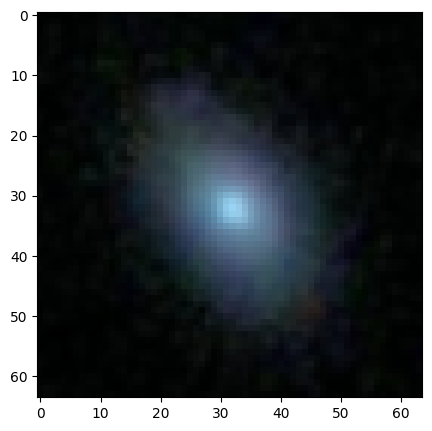

In [175]:
# Crear un solo arreglo de todas las imagenes dentro de las carpetas TEST
image1 = cv2.imread('/home/luiscantero/Hola/Python/deep_learning/Neural_Networks_and_Deep_Learning/W2_A2/test_galaxies/0_Smooth, in-between round.png')
image1 = cv2.resize(image1, dimens, interpolation = cv2.INTER_AREA)
image2 = cv2.imread('/home/luiscantero/Hola/Python/deep_learning/Neural_Networks_and_Deep_Learning/W2_A2/test_galaxies/1000_Disk, Edge-on, Rounded Bulge.png')
image2 = cv2.resize(image2, dimens, interpolation = cv2.INTER_AREA)

test_set_x_orig_2 = np.append(image1 , image1)
test_set_x_orig_2.shape

basepath = '/home/luiscantero/Hola/Python/deep_learning/Neural_Networks_and_Deep_Learning/W2_A2/test_galaxies/'

i = 0
with os.scandir(basepath) as entries:
    for entry in entries:
        if entry.is_file():
            print(str(entry.name))
            if(i > 1):
                name = f'/home/luiscantero/Hola/Python/deep_learning/Neural_Networks_and_Deep_Learning/W2_A2/test_galaxies/' + str(entry.name)
                image1 = cv2.imread(name)
                image1 = cv2.resize(image1, dimens, interpolation = cv2.INTER_AREA)
                imaget = test_set_x_orig_2
                test_set_x_orig_2 = np.append(imaget , image1)
        i = i + 1   

basepath2 = '/home/luiscantero/Hola/Python/deep_learning/Neural_Networks_and_Deep_Learning/W2_A2/test_galaxies_lsst/'
        
with os.scandir(basepath2) as entries:
    for entry in entries:
        if entry.is_file():
            print(str(entry.name))
            name = f'/home/luiscantero/Hola/Python/deep_learning/Neural_Networks_and_Deep_Learning/W2_A2/test_galaxies_lsst/' + str(entry.name)
            image1 = cv2.imread(name)
            image1 = cv2.resize(image1, dimens, interpolation = cv2.INTER_AREA)
            imaget = test_set_x_orig_2
            test_set_x_orig_2 = np.append(imaget , image1)

basepath3 = '/home/luiscantero/Hola/Python/deep_learning/Neural_Networks_and_Deep_Learning/W2_A2/test_galaxies_lens/'
        
with os.scandir(basepath3) as entries:
    for entry in entries:
        if entry.is_file():
            print(str(entry.name))
            name = f'/home/luiscantero/Hola/Python/deep_learning/Neural_Networks_and_Deep_Learning/W2_A2/test_galaxies_lens/' + str(entry.name)
            image1 = cv2.imread(name)
            image1 = cv2.resize(image1, dimens, interpolation = cv2.INTER_AREA)
            imaget = test_set_x_orig_2
            test_set_x_orig_2 = np.append(imaget , image1)
        
p = test_set_x_orig_2.shape[0]/(n_pixeles*n_pixeles*3) 
r = int(p)
plt.imshow(test_set_x_orig_2.reshape(r, n_pixeles, n_pixeles, 3)[1])

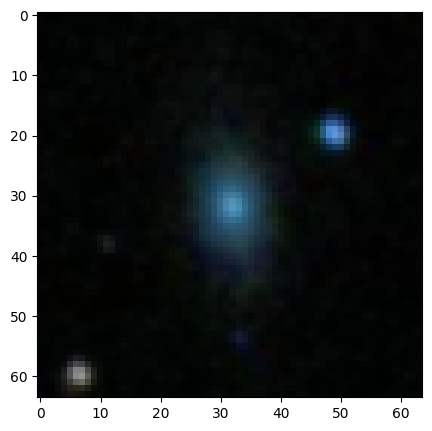

In [176]:
plt.imshow(train_set_x_orig_2.reshape(r2, n_pixeles, n_pixeles, 3)[10])

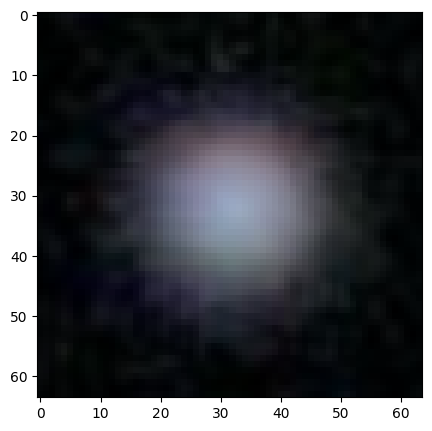

In [177]:
plt.imshow(test_set_x_orig_2.reshape(r, n_pixeles, n_pixeles, 3)[10])

In [178]:
train = train_set_x_orig_2.reshape(r2, n_pixeles, n_pixeles, 3)
train.shape

(5588, 64, 64, 3)

In [179]:
# para train
d1=2199 + 200 + 487+1 # sin lentes
d2=2400 + 300 #con lentes

hola = np.zeros((1, d1 + 1)) 
bye = np.zeros((1, d2)) + 1
c = np.append(hola, bye)
c_train = c.reshape(1, d1+d2 +1)
c_train.shape

(1, 5588)

In [180]:
test = test_set_x_orig_2.reshape(r, n_pixeles, n_pixeles, 3)
test.shape

(3201, 64, 64, 3)

In [181]:
# para test
d1=1500+200+1 #sin lentes
d2=1500 #con lentes

hola = np.zeros((1, d1))
bye = np.zeros((1, d2)) + 1
c = np.append(hola, bye)
c_test = c.reshape(1, d1+d2)
c_test.shape

(1, 3201)

<a name='2'></a>
## 2 - Overview of the Problem set ##

**Problem Statement**: You are given a dataset ("data.h5") containing:
    - a training set of m_train images labeled as cat (y=1) or non-cat (y=0)
    - a test set of m_test images labeled as cat or non-cat
    - each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). Thus, each image is square (height = num_px) and (width = num_px).

You will build a simple image-recognition algorithm that can correctly classify pictures as cat or non-cat.

Let's get more familiar with the dataset. Load the data by running the following code.

In [182]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [183]:
classes

array([b'non-cat', b'cat'], dtype='|S7')

In [184]:
# Loading the data "LENS / NO_LENS"
classes2 = classes
classes2[0] = b'NO_LENS'
classes2[1] = b'LENS'


train_set_x_orig = train
train_set_y = c_train
test_set_x_orig = test
test_set_y = c_test
classes = classes2

In [185]:
classes

array([b'NO_LENS', b'LENS'], dtype='|S7')

In [186]:
classes[np.squeeze(train_set_y[:, 0].astype(int))].decode("utf-8")

'NO_LENS'

We added "_orig" at the end of image datasets (train and test) because we are going to preprocess them. After preprocessing, we will end up with train_set_x and test_set_x (the labels train_set_y and test_set_y don't need any preprocessing).

Each line of your train_set_x_orig and test_set_x_orig is an array representing an image. You can visualize an example by running the following code. Feel free also to change the `index` value and re-run to see other images. 

y = [0.], it's a 'NO_LENS' picture.


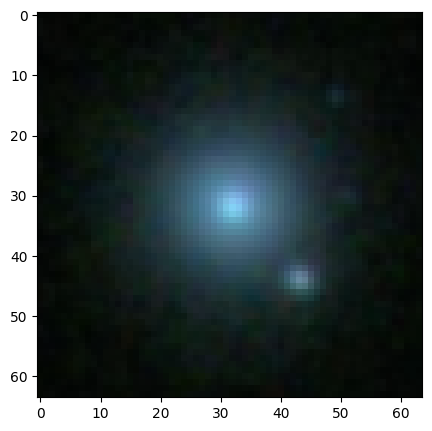

In [187]:
# Example of a picture from TRAIN SET
index = 25
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index].astype(int))].decode("utf-8") +  "' picture.")

y = [0.], it's a 'NO_LENS' picture.


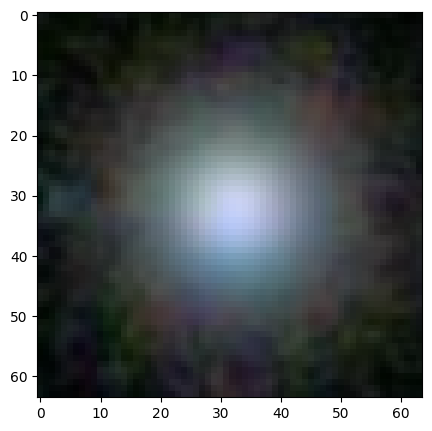

In [188]:
# Example of a picture from TEST SET
index = 5
plt.imshow(test_set_x_orig[index])
print ("y = " + str(test_set_y[:, index]) + ", it's a '" + classes[np.squeeze(test_set_y[:, index].astype(int))].decode("utf-8") +  "' picture.")

Many software bugs in deep learning come from having matrix/vector dimensions that don't fit. If you can keep your matrix/vector dimensions straight you will go a long way toward eliminating many bugs. 

<a name='ex-1'></a>
### Exercise 1
Find the values for:
    - m_train (number of training examples)
    - m_test (number of test examples)
    - num_px (= height = width of a training image)
Remember that `train_set_x_orig` is a numpy-array of shape (m_train, num_px, num_px, 3). For instance, you can access `m_train` by writing `train_set_x_orig.shape[0]`.

In [189]:
#(≈ 3 lines of code)
# m_train = 
# m_test = 
# num_px = 
# YOUR CODE STARTS HERE
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = len(train_set_x_orig[0])
# YOUR CODE ENDS HERE

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 5588
Number of testing examples: m_test = 3201
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (5588, 64, 64, 3)
train_set_y shape: (1, 5588)
test_set_x shape: (3201, 64, 64, 3)
test_set_y shape: (1, 3201)


**Expected Output for m_train, m_test and num_px**: 
<table style="width:15%">
  <tr>
    <td> m_train </td>
    <td> 209 </td> 
  </tr>
  
  <tr>
    <td>m_test</td>
    <td> 50 </td> 
  </tr>
  
  <tr>
    <td>num_px</td>
    <td> 64 </td> 
  </tr>
  
</table>


For convenience, you should now reshape images of shape (num_px, num_px, 3) in a numpy-array of shape (num_px $*$ num_px $*$ 3, 1). After this, our training (and test) dataset is a numpy-array where each column represents a flattened image. There should be m_train (respectively m_test) columns.

<a name='ex-2'></a>
### Exercise 2
Reshape the training and test data sets so that images of size (num_px, num_px, 3) are flattened into single vectors of shape (num\_px $*$ num\_px $*$ 3, 1).

A trick when you want to flatten a matrix X of shape (a,b,c,d) to a matrix X_flatten of shape (b$*$c$*$d, a) is to use: 
```python
X_flatten = X.reshape(X.shape[0], -1).T      # X.T is the transpose of X
```

In [190]:
# Reshape the training and test examples
#(≈ 2 lines of code)
# train_set_x_flatten = ...
# test_set_x_flatten = ...
# YOUR CODE STARTS HERE
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
# YOUR CODE ENDS HERE

# Check that the first 10 pixels of the second image are in the correct place
#assert np.alltrue(train_set_x_flatten[0:10, 1] == [196, 192, 190, 193, 186, 182, 188, 179, 174, 213]), "Wrong solution. Use (X.shape[0], -1).T."
#assert np.alltrue(test_set_x_flatten[0:10, 1] == [115, 110, 111, 137, 129, 129, 155, 146, 145, 159]), "Wrong solution. Use (X.shape[0], -1).T."

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x_flatten shape: (12288, 5588)
train_set_y shape: (1, 5588)
test_set_x_flatten shape: (12288, 3201)
test_set_y shape: (1, 3201)


**Expected Output**: 

<table style="width:35%">
  <tr>
    <td>train_set_x_flatten shape</td>
    <td> (12288, 209)</td> 
  </tr>
  <tr>
    <td>train_set_y shape</td>
    <td>(1, 209)</td> 
  </tr>
  <tr>
    <td>test_set_x_flatten shape</td>
    <td>(12288, 50)</td> 
  </tr>
  <tr>
    <td>test_set_y shape</td>
    <td>(1, 50)</td> 
  </tr>
</table>

To represent color images, the red, green and blue channels (RGB) must be specified for each pixel, and so the pixel value is actually a vector of three numbers ranging from 0 to 255.

One common preprocessing step in machine learning is to center and standardize your dataset, meaning that you substract the mean of the whole numpy array from each example, and then divide each example by the standard deviation of the whole numpy array. But for picture datasets, it is simpler and more convenient and works almost as well to just divide every row of the dataset by 255 (the maximum value of a pixel channel).

<!-- During the training of your model, you're going to multiply weights and add biases to some initial inputs in order to observe neuron activations. Then you backpropogate with the gradients to train the model. But, it is extremely important for each feature to have a similar range such that our gradients don't explode. You will see that more in detail later in the lectures. !--> 

Let's standardize our dataset.

In [191]:
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

<a name='4'></a>
## 4 - Building the parts of our algorithm ## 

The main steps for building a Neural Network are:
1. Define the model structure (such as number of input features) 
2. Initialize the model's parameters
3. Loop:
    - Calculate current loss (forward propagation)
    - Calculate current gradient (backward propagation)
    - Update parameters (gradient descent)

You often build 1-3 separately and integrate them into one function we call `model()`.

<a name='4-1'></a>
### 4.1 - Helper functions

<a name='ex-3'></a>
### Exercise 3 - sigmoid
Using your code from "Python Basics", implement `sigmoid()`. As you've seen in the figure above, you need to compute $sigmoid(z) = \frac{1}{1 + e^{-z}}$ for $z = w^T x + b$ to make predictions. Use np.exp().

<font color='blue'>
    
    
**What you need to remember:**

Common steps for pre-processing a new dataset are:
- Figure out the dimensions and shapes of the problem (m_train, m_test, num_px, ...)
- Reshape the datasets such that each example is now a vector of size (num_px \* num_px \* 3, 1)
- "Standardize" the data

<a name='3'></a>
## 3 - General Architecture of the learning algorithm ##

It's time to design a simple algorithm to distinguish cat images from non-cat images.

You will build a Logistic Regression, using a Neural Network mindset. The following Figure explains why **Logistic Regression is actually a very simple Neural Network!**

<img src="images/LogReg_kiank.png" style="width:650px;height:400px;">

**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

**Key steps**:
In this exercise, you will carry out the following steps: 
    - Initialize the parameters of the model
    - Learn the parameters for the model by minimizing the cost  
    - Use the learned parameters to make predictions (on the test set)
    - Analyse the results and conclude

In [192]:
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    #(≈ 1 line of code)
    # s = ...
    # YOUR CODE STARTS HERE
    s = 1 / (1+np.exp(-z))
    # YOUR CODE ENDS HERE
    
    return s

In [193]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid_test(sigmoid)

sigmoid([0, 2]) = [0.5        0.88079708]
All tests passed!


In [194]:
x = np.array([0.5, 0, 2.0])
output = sigmoid(x)
print(output)

[0.62245933 0.5        0.88079708]


<a name='4-2'></a>
### 4.2 - Initializing parameters

<a name='ex-4'></a>
### Exercise 4 - initialize_with_zeros
Implement parameter initialization in the cell below. You have to initialize w as a vector of zeros. If you don't know what numpy function to use, look up np.zeros() in the Numpy library's documentation.

In [195]:
# GRADED FUNCTION: initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias) of type float
    """
    
    # (≈ 2 lines of code)
    # w = ...
    # b = ...
    # YOUR CODE STARTS HERE
    w = np.zeros([dim, 1])
    b = 0.0
    # YOUR CODE ENDS HERE

    return w, b

In [196]:
dim = 2
w, b = initialize_with_zeros(dim)

assert type(b) == float
print ("w = " + str(w))
print ("b = " + str(b))

initialize_with_zeros_test_1(initialize_with_zeros)
initialize_with_zeros_test_2(initialize_with_zeros)


w = [[0.]
 [0.]]
b = 0.0
First test passed!
Second test passed!


<a name='4-3'></a>
### 4.3 - Forward and Backward propagation

Now that your parameters are initialized, you can do the "forward" and "backward" propagation steps for learning the parameters.

<a name='ex-5'></a>
### Exercise 5 - propagate
Implement a function `propagate()` that computes the cost function and its gradient.

**Hints**:

Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)}))$

Here are the two formulas you will be using: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In [197]:
# GRADED FUNCTION: propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    #(≈ 2 lines of code)
    # compute activation
    # A = ...
    # compute cost by using np.dot to perform multiplication. 
    # And don't use loops for the sum.
    # cost = ...                                
    # YOUR CODE STARTS HERE
    A = sigmoid( np.dot(w.T, X) + b)
    cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
    # YOUR CODE ENDS HERE

    # BACKWARD PROPAGATION (TO FIND GRAD)
    #(≈ 2 lines of code)
    # dw = ...
    # db = ...
    # YOUR CODE STARTS HERE
    dw = 1/m * np.dot(X, (A - Y).T)
    db = 1/m * np.sum(A - Y)
    # YOUR CODE ENDS HERE
    cost = np.squeeze(np.array(cost))

    
    grads = {"dw": dw,
             "db": db}
    return grads, cost

In [198]:
w =  np.array([[1.], [2]])
b = 1.5
X = np.array([[1., -2., -1.], [3., 0.5, -3.2]])
Y = np.array([[1, 1, 0]])
grads, cost = propagate(w, b, X, Y)

assert type(grads["dw"]) == np.ndarray
assert grads["dw"].shape == (2, 1)
assert type(grads["db"]) == np.float64


print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

propagate_test(propagate)

dw = [[ 0.25071532]
 [-0.06604096]]
db = -0.1250040450043965
cost = 0.15900537707692405
All tests passed!


**Expected output**

```
dw = [[ 0.25071532]
 [-0.06604096]]
db = -0.1250040450043965
cost = 0.15900537707692405
```

<a name='4-4'></a>
### 4.4 - Optimization
- You have initialized your parameters.
- You are also able to compute a cost function and its gradient.
- Now, you want to update the parameters using gradient descent.

<a name='ex-6'></a>
### Exercise 6 - optimize
Write down the optimization function. The goal is to learn $w$ and $b$ by minimizing the cost function $J$. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

In [199]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    
    costs = []
    
    for i in range(num_iterations):
        # (≈ 1 lines of code)
        # Cost and gradient calculation 
        # grads, cost = ...
        # YOUR CODE STARTS HERE
        grads, cost = propagate(w, b, X, Y)
        # YOUR CODE ENDS HERE
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        # w = ...
        # b = ...
        # YOUR CODE STARTS HERE
        w = w - learning_rate * dw
        b = b - learning_rate * db
        # YOUR CODE ENDS HERE
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
            # Print the cost every 100 training iterations
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [200]:
params, grads, costs = optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print("Costs = " + str(costs))

optimize_test(optimize)

w = [[0.80956046]
 [2.0508202 ]]
b = 1.5948713189708588
dw = [[ 0.17860505]
 [-0.04840656]]
db = -0.08888460336847771
Costs = [array(0.15900538)]
All tests passed!


<a name='ex-7'></a>
### Exercise 7 - predict
The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the `predict()` function. There are two steps to computing predictions:

1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector `Y_prediction`. If you wish, you can use an `if`/`else` statement in a `for` loop (though there is also a way to vectorize this). 

In [201]:
# GRADED FUNCTION: predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    #(≈ 1 line of code)
    # A = ...
    # YOUR CODE STARTS HERE
    A = sigmoid( np.dot(w.T, X) + b)
    # YOUR CODE ENDS HERE
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        #(≈ 4 lines of code)
        # if A[0, i] > ____ :
        #     Y_prediction[0,i] = 
        # else:
        #     Y_prediction[0,i] = 
        # YOUR CODE STARTS HERE
        if A[0,i]>0.5:
            Y_prediction[0,i] = 1
        else:
            Y_prediction[0,i] = 0
        # YOUR CODE ENDS HERE
    
    return Y_prediction

In [202]:
w = np.array([[0.1124579], [0.23106775]])
b = -0.3
X = np.array([[1., -1.1, -3.2],[1.2, 2., 0.1]])
print ("predictions = " + str(predict(w, b, X)))

predict_test(predict)

predictions = [[1. 1. 0.]]
All tests passed!


<font color='blue'>
    
**What to remember:**
    
You've implemented several functions that:
- Initialize (w,b)
- Optimize the loss iteratively to learn parameters (w,b):
    - Computing the cost and its gradient 
    - Updating the parameters using gradient descent
- Use the learned (w,b) to predict the labels for a given set of examples

<a name='5'></a>
## 5 - Merge all functions into a model ##

You will now see how the overall model is structured by putting together all the building blocks (functions implemented in the previous parts) together, in the right order.

<a name='ex-8'></a>
### Exercise 8 - model
Implement the model function. Use the following notation:
    - Y_prediction_test for your predictions on the test set
    - Y_prediction_train for your predictions on the train set
    - parameters, grads, costs for the outputs of optimize()

In [203]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.005, print_cost=True):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to True to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    # (≈ 1 line of code)   
    # initialize parameters with zeros 
    # w, b = ...
    
    #(≈ 1 line of code)
    # Gradient descent 
    # params, grads, costs = ...
    
    # Retrieve parameters w and b from dictionary "params"
    # w = ...
    # b = ...
    
    # Predict test/train set examples (≈ 2 lines of code)
    # Y_prediction_test = ...
    # Y_prediction_train = ...
    
    # YOUR CODE STARTS HERE
    w, b = initialize_with_zeros(X_train.shape[0])
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    w = params["w"]
    b = params["b"]
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    # YOUR CODE ENDS HERE

    # Print train/test Errors
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [204]:
from public_tests import *

model_test(model)

Cost after iteration 0: 0.693147
train accuracy: 85.71428571428572 %
test accuracy: 66.66666666666667 %
All tests passed!


If you pass all the tests, run the following cell to train your model.

In [220]:
logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=2500, learning_rate=0.009, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.136793
Cost after iteration 200: 0.102947
Cost after iteration 300: 0.088378
Cost after iteration 400: 0.079494
Cost after iteration 500: 0.073189
Cost after iteration 600: 0.068329
Cost after iteration 700: 0.064387
Cost after iteration 800: 0.061081
Cost after iteration 900: 0.058242
Cost after iteration 1000: 0.055761
Cost after iteration 1100: 0.053562
Cost after iteration 1200: 0.051593
Cost after iteration 1300: 0.049815
Cost after iteration 1400: 0.048197
Cost after iteration 1500: 0.046715
Cost after iteration 1600: 0.045352
Cost after iteration 1700: 0.044092
Cost after iteration 1800: 0.042922
Cost after iteration 1900: 0.041832
Cost after iteration 2000: 0.040813
Cost after iteration 2100: 0.039858
Cost after iteration 2200: 0.038961
Cost after iteration 2300: 0.038115
Cost after iteration 2400: 0.037317
train accuracy: 99.62419470293486 %
test accuracy: 88.81599500156202 %


In [218]:
logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=2500, learning_rate=0.05, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.070115
Cost after iteration 200: 0.053247
Cost after iteration 300: 0.044454
Cost after iteration 400: 0.038738
Cost after iteration 500: 0.034637
Cost after iteration 600: 0.031516
Cost after iteration 700: 0.029043
Cost after iteration 800: 0.027025
Cost after iteration 900: 0.025338
Cost after iteration 1000: 0.023904
Cost after iteration 1100: 0.022664
Cost after iteration 1200: 0.021580
Cost after iteration 1300: 0.020622
Cost after iteration 1400: 0.019766
Cost after iteration 1500: 0.018996
Cost after iteration 1600: 0.018298
Cost after iteration 1700: 0.017661
Cost after iteration 1800: 0.017078
Cost after iteration 1900: 0.016540
Cost after iteration 2000: 0.016042
Cost after iteration 2100: 0.015580
Cost after iteration 2200: 0.015148
Cost after iteration 2300: 0.014745
Cost after iteration 2400: 0.014366
train accuracy: 99.83894058697209 %
test accuracy: 87.69134645423306 %


In [221]:
logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=1400, learning_rate=0.3, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.031245
Cost after iteration 200: 0.021565
Cost after iteration 300: 0.017106
Cost after iteration 400: 0.014403
Cost after iteration 500: 0.012535
Cost after iteration 600: 0.011144
Cost after iteration 700: 0.010058
Cost after iteration 800: 0.009183
Cost after iteration 900: 0.008460
Cost after iteration 1000: 0.007850
Cost after iteration 1100: 0.007327
Cost after iteration 1200: 0.006873
Cost after iteration 1300: 0.006474
train accuracy: 99.92841803865426 %
test accuracy: 87.03530146829115 %


**Comment**: Training accuracy is close to 100%. This is a good sanity check: your model is working and has high enough capacity to fit the training data. Test accuracy is 70%. It is actually not bad for this simple model, given the small dataset we used and that logistic regression is a linear classifier. But no worries, you'll build an even better classifier next week!

Also, you see that the model is clearly overfitting the training data. Later in this specialization you will learn how to reduce overfitting, for example by using regularization. Using the code below (and changing the `index` variable) you can look at predictions on pictures of the test set.

y = 0.0, you predicted that it is a "NO_LENS" picture.


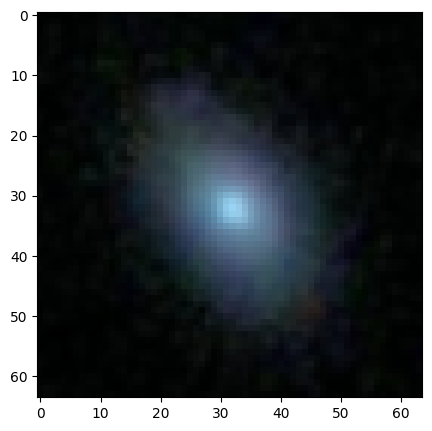

In [206]:
# Example of a picture that was wrongly classified.
index = 1
plt.imshow(test_set_x[:, index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[int(logistic_regression_model['Y_prediction_test'][0,index])].decode("utf-8") +  "\" picture.")

Let's also plot the cost function and the gradients.

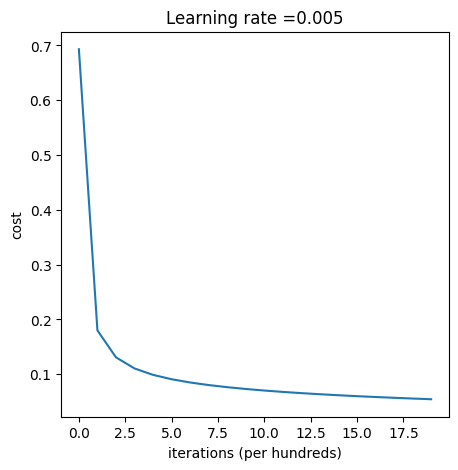

In [207]:
# Plot learning curve (with costs)
costs = np.squeeze(logistic_regression_model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(logistic_regression_model["learning_rate"]))
plt.show()

**Interpretation**:
You can see the cost decreasing. It shows that the parameters are being learned. However, you see that you could train the model even more on the training set. Try to increase the number of iterations in the cell above and rerun the cells. You might see that the training set accuracy goes up, but the test set accuracy goes down. This is called overfitting. 

<a name='6'></a>
## 6 - Further analysis (optional/ungraded exercise) ##

Congratulations on building your first image classification model. Let's analyze it further, and examine possible choices for the learning rate $\alpha$. 

#### Choice of learning rate ####

**Reminder**:
In order for Gradient Descent to work you must choose the learning rate wisely. The learning rate $\alpha$  determines how rapidly we update the parameters. If the learning rate is too large we may "overshoot" the optimal value. Similarly, if it is too small we will need too many iterations to converge to the best values. That's why it is crucial to use a well-tuned learning rate.

Let's compare the learning curve of our model with several choices of learning rates. Run the cell below. This should take about 1 minute. Feel free also to try different values than the three we have initialized the `learning_rates` variable to contain, and see what happens. 

Training a model with learning rate: 0.01
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.130625
Cost after iteration 200: 0.098857
Cost after iteration 300: 0.084997
Cost after iteration 400: 0.076455
Cost after iteration 500: 0.070346
Cost after iteration 600: 0.065615
Cost after iteration 700: 0.061767
Cost after iteration 800: 0.058536
Cost after iteration 900: 0.055758
Cost after iteration 1000: 0.053331
Cost after iteration 1100: 0.051181
Cost after iteration 1200: 0.049257
Cost after iteration 1300: 0.047521
Cost after iteration 1400: 0.045943
train accuracy: 99.57050823192556 %
test accuracy: 88.6910340518588 %

-------------------------------------------------------

Training a model with learning rate: 0.001
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.391469
Cost after iteration 200: 0.285987
Cost after iteration 300: 0.233332
Cost after iteration 400: 0.201795
Cost after iteration 500: 0.180677
Cost after iteration 600: 0.165452
Cost after itera

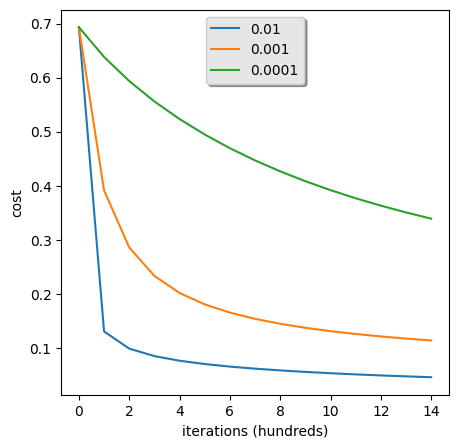

In [208]:
learning_rates = [0.008] #[0.01, 0.001, 0.0001]
models = {}

for lr in learning_rates:
    print ("Training a model with learning rate: " + str(lr))
    models[str(lr)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=2500, learning_rate=lr, print_cost=True)
    print ('\n' + "-------------------------------------------------------" + '\n')

for lr in learning_rates:
    plt.plot(np.squeeze(models[str(lr)]["costs"]), label=str(models[str(lr)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

Training a model with learning rate: 0.008
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.144204
Cost after iteration 200: 0.107804
Cost after iteration 300: 0.092343
Cost after iteration 400: 0.083025
Cost after iteration 500: 0.076470
Cost after iteration 600: 0.071448
Cost after iteration 700: 0.067391
Cost after iteration 800: 0.063996
Cost after iteration 900: 0.061085
Cost after iteration 1000: 0.058541
Cost after iteration 1100: 0.056288
Cost after iteration 1200: 0.054269
Cost after iteration 1300: 0.052445
Cost after iteration 1400: 0.050783
Cost after iteration 1500: 0.049260
Cost after iteration 1600: 0.047858
Cost after iteration 1700: 0.046560
Cost after iteration 1800: 0.045353
Cost after iteration 1900: 0.044228
Cost after iteration 2000: 0.043176
Cost after iteration 2100: 0.042188
Cost after iteration 2200: 0.041259
Cost after iteration 2300: 0.040382
Cost after iteration 2400: 0.039554
train accuracy: 99.62419470293486 %
test accuracy: 88.78475476413621 

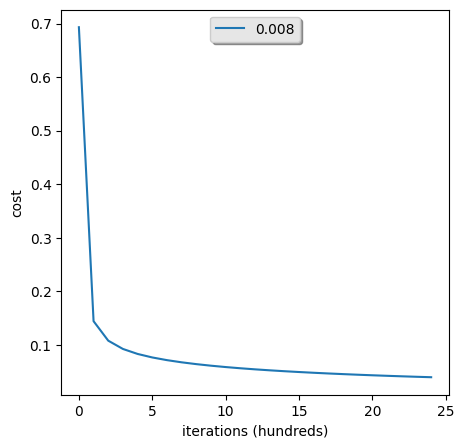

In [216]:
learning_rates = [0.008] #[0.01, 0.001, 0.0001]
models = {}

for lr in learning_rates:
    print ("Training a model with learning rate: " + str(lr))
    models[str(lr)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=2500, learning_rate=lr, print_cost=True)
    print ('\n' + "-------------------------------------------------------" + '\n')

for lr in learning_rates:
    plt.plot(np.squeeze(models[str(lr)]["costs"]), label=str(models[str(lr)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

**Interpretation**: 
- Different learning rates give different costs and thus different predictions results.
- If the learning rate is too large (0.01), the cost may oscillate up and down. It may even diverge (though in this example, using 0.01 still eventually ends up at a good value for the cost). 
- A lower cost doesn't mean a better model. You have to check if there is possibly overfitting. It happens when the training accuracy is a lot higher than the test accuracy.
- In deep learning, we usually recommend that you: 
    - Choose the learning rate that better minimizes the cost function.
    - If your model overfits, use other techniques to reduce overfitting. (We'll talk about this in later videos.) 


<a name='7'></a>
## 7 - Test with your own image (optional/ungraded exercise) ##

Congratulations on finishing this assignment. You can use your own image and see the output of your model. To do that:
    1. Click on "File" in the upper bar of this notebook, then click "Open" to go on your Coursera Hub.
    2. Add your image to this Jupyter Notebook's directory, in the "images" folder
    3. Change your image's name in the following code
    4. Run the code and check if the algorithm is right (1 = cat, 0 = non-cat)!

In [209]:
# saving here W and b...

logistic_regression_model["w"]

array([[-0.00345312],
       [-0.00036452],
       [ 0.00017052],
       ...,
       [-0.00656198],
       [-0.00400552],
       [-0.00442876]])

In [210]:
logistic_regression_model["w"].shape

(12288, 1)

In [211]:
logistic_regression_model["w"].tofile('pesos_w.csv', sep = ',')  

In [212]:
logistic_regression_model["b"]

-0.15657814454730362

In [213]:
logistic_regression_model["b"].tofile('pesos_b.csv', sep = ',')  

In [222]:
# We preprocess the image to fit your algorithm.
def predecir(my_image): 
    fname = "images/" + my_image
    image = np.array(Image.open(fname).resize((num_px, num_px)))
    plt.rcParams ["figure.figsize"] = (5,5)
    plt.imshow(image)
    image = image / 255.
    image = image.reshape((1, num_px * num_px * 3)).T
    my_predicted_image = predict(logistic_regression_model["w"], logistic_regression_model["b"], image)
    print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

y = 0.0, your algorithm predicts a "NO_LENS" picture.


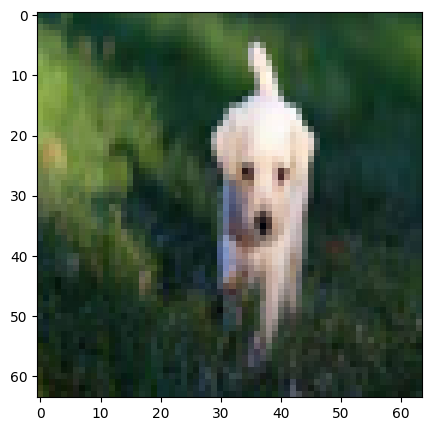

In [223]:
# change this to the name of your image file
my_image = "gato_no_1.jpg"   
predecir(my_image)

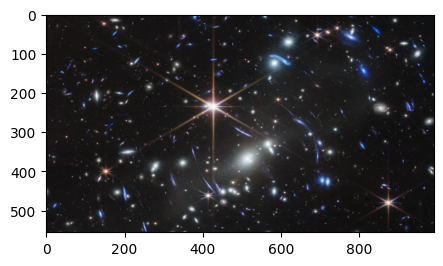

In [224]:
image = cv2.imread('images/smacs.jpeg')
plt.imshow(image)
plt.rcParams ["figure.figsize"] = (15,15)
plt.show()

y = 0.0, your algorithm predicts a "NO_LENS" picture.


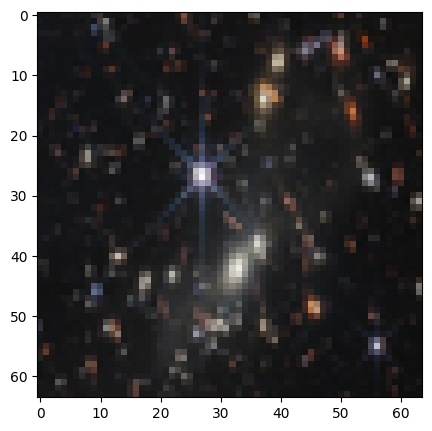

In [225]:
my_image = "smacs0723.jpg"   
predecir(my_image)

y = 0.0, your algorithm predicts a "NO_LENS" picture.


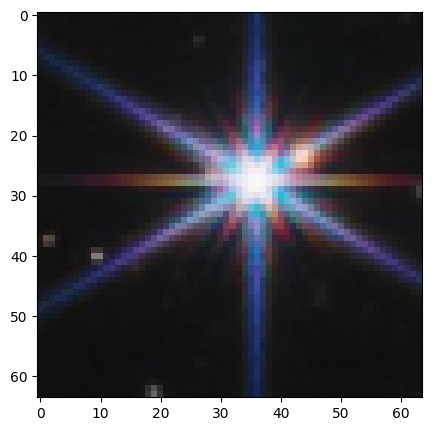

In [226]:
my_image = "lente_no_1.jpg"   
predecir(my_image)

y = 0.0, your algorithm predicts a "NO_LENS" picture.


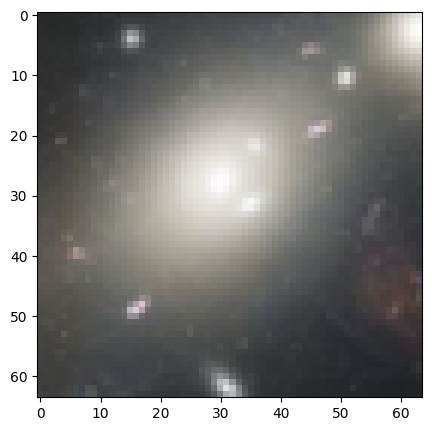

In [227]:
my_image = "lente_no_2.jpg"   
predecir(my_image)

y = 0.0, your algorithm predicts a "NO_LENS" picture.


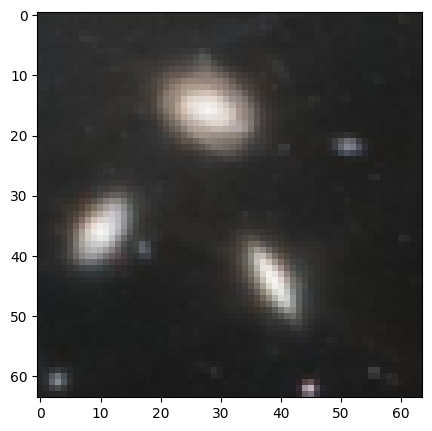

In [228]:
my_image = "lente_no_3.jpg"   
predecir(my_image)

y = 0.0, your algorithm predicts a "NO_LENS" picture.


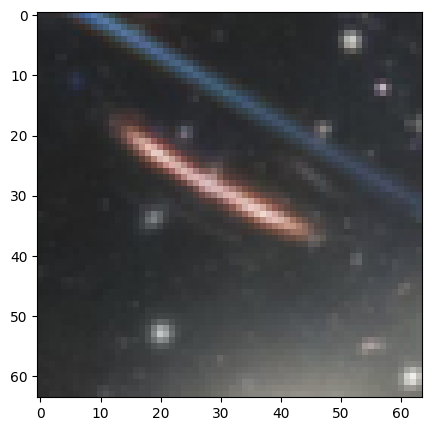

In [229]:
my_image = "lente_no_4.jpg"   
predecir(my_image)

y = 0.0, your algorithm predicts a "NO_LENS" picture.


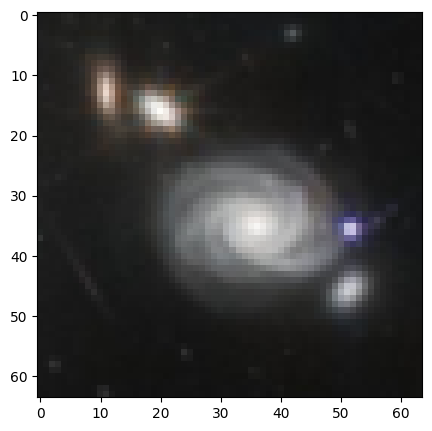

In [230]:
my_image = "lente_no_5.jpg"   
predecir(my_image)

y = 0.0, your algorithm predicts a "NO_LENS" picture.


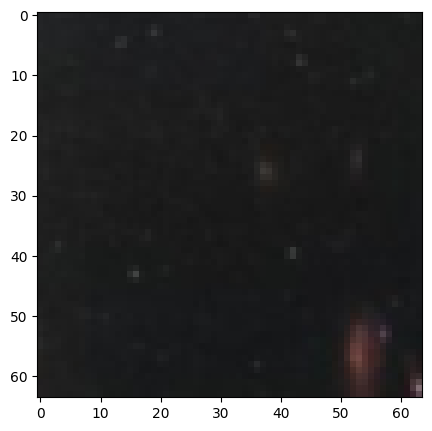

In [231]:
my_image = "lente_sino_1.jpg"   
predecir(my_image)

y = 0.0, your algorithm predicts a "NO_LENS" picture.


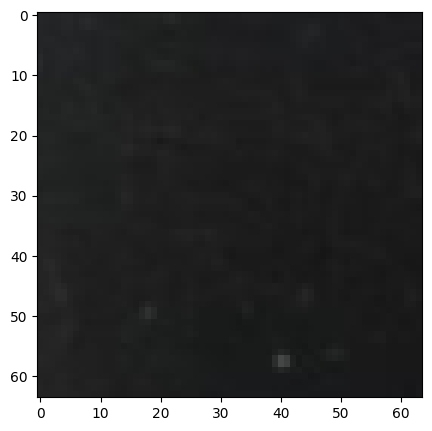

In [232]:
my_image = "lente_sino_2.jpg"   
predecir(my_image)

y = 0.0, your algorithm predicts a "NO_LENS" picture.


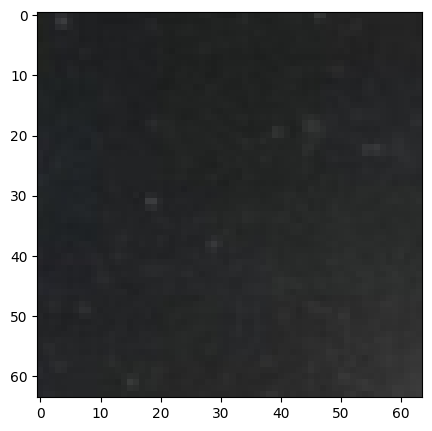

In [233]:
my_image = "lente_sino_3.jpg"   
predecir(my_image)

y = 0.0, your algorithm predicts a "NO_LENS" picture.


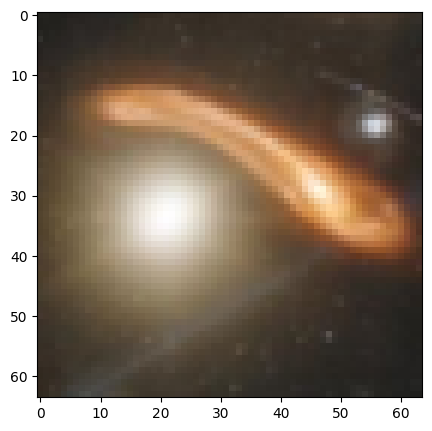

In [234]:
my_image = "lente_si_1.jpg"   
predecir(my_image)

y = 0.0, your algorithm predicts a "NO_LENS" picture.


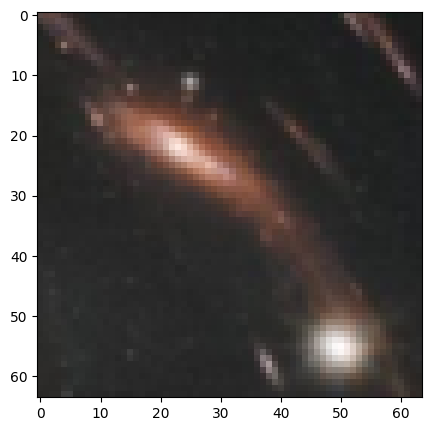

In [235]:
my_image = "lente_si_2.jpg"   
predecir(my_image)

y = 0.0, your algorithm predicts a "NO_LENS" picture.


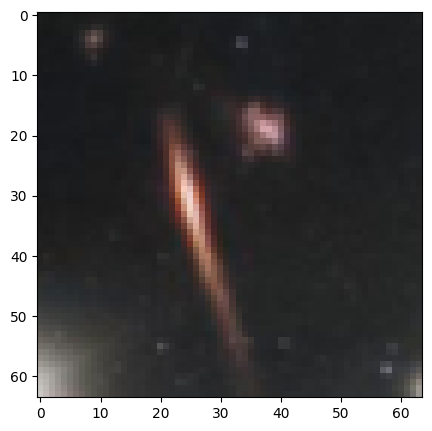

In [236]:
my_image = "lente_si_3.jpg"   
predecir(my_image)

y = 0.0, your algorithm predicts a "NO_LENS" picture.


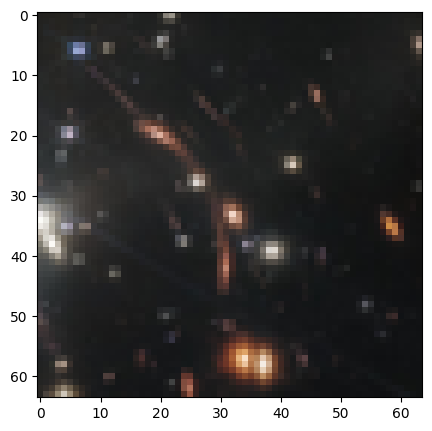

In [237]:
my_image = "lente_si_4.jpg"   
predecir(my_image)

y = 0.0, your algorithm predicts a "NO_LENS" picture.


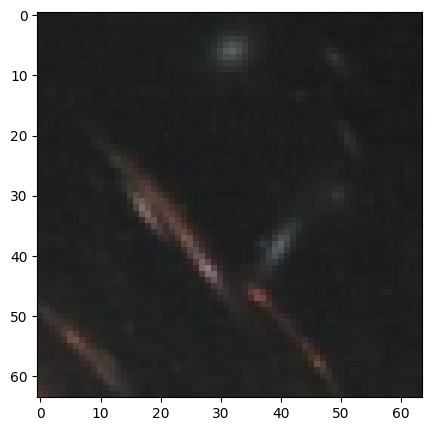

In [238]:
my_image = "lente_si_5.jpg"   
predecir(my_image)

y = 0.0, your algorithm predicts a "NO_LENS" picture.


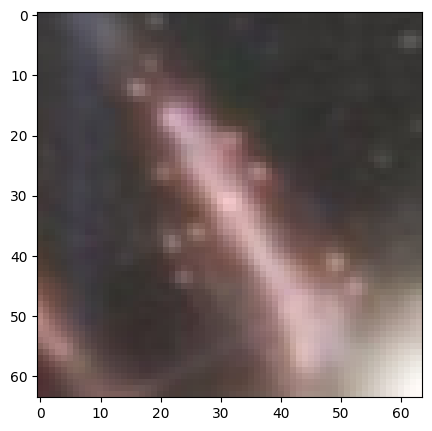

In [239]:
my_image = "lente_si_6.jpg"   
predecir(my_image)

<font color='blue'>
    
**What to remember from this assignment:**
1. Preprocessing the dataset is important.
2. You implemented each function separately: initialize(), propagate(), optimize(). Then you built a model().
3. Tuning the learning rate (which is an example of a "hyperparameter") can make a big difference to the algorithm. You will see more examples of this later in this course!

Finally, if you'd like, we invite you to try different things on this Notebook. Make sure you submit before trying anything. Once you submit, things you can play with include:
    - Play with the learning rate and the number of iterations
    - Try different initialization methods and compare the results
    - Test other preprocessings (center the data, or divide each row by its standard deviation)

Bibliography:
- http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/
- https://stats.stackexchange.com/questions/211436/why-do-we-normalize-images-by-subtracting-the-datasets-image-mean-and-not-the-c